> ## Exploratory Data Analysis of the Used Car Auction Prices dataset
>> ### MDDB Group A - Team 1 - AI Methods for Business
>
>> ### Nadia Aflatounian
>> ### Max Heijmans
>> ### Carl Hümbs
>> ### Can Senturk

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 0</span>
    <h1 style="font-size: 30px;">Business question and sub questions</h1>
</div>

> The goal of this Jupyter notebook and EDA is to answer the business question put forward, namely:
>> Can the dealership use predictive models to identify vehicles with a high resale value? 
>
> Similarly, to help answer the business question holistically, the following sub questions need to be answered:
>> Which specific features in the dataset (such as make, model, year, and condition) are identified by the predictive models as the strongest predictors of high resale value?
>>
>> How do the age and condition of vehicles influence their predicted resale value according to the models? 
>>
>> How do the random forest and neural network models interpret market trends from historical data to predict future resale values of different vehicle types? 
>>
>> How accurately do the predictive models forecast resale values across different segments of vehicles (e.g., luxury vs. economy cars, SUVs vs. sedans) based on the dataset?
>>
>> What insights do the models provide about the influence of regional factors (such as state of sale) on the resale value of vehicles, and how can this information guide a dealership's purchasing decisions? 

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Importing the necessary libraries and reading the dataset</h1>
</div>

In [978]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from datetime import datetime
import datetime
from sklearn.preprocessing import StandardScaler

In [979]:
#Impporting csv file
car_df = pd.read_csv(r"car_prices.csv", delimiter=',', on_bad_lines='skip') # Skipping 17 out of 558812, because of faulty data
df_original_len = len(car_df)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(car_df.shape[0], car_df.shape[1]))

Original length of dataframe: 558811
There are 558811 rows and 16 columns in the dataset


In [980]:
car_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [981]:
car_df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 2</span>
    <h1 style="font-size: 30px;">Cleaning the dataset</h1>
</div>

In [982]:
#Renaming 'make' to 'brand' for easier understanding
car_df.rename(columns={'make': 'brand'}, inplace=True)

In [983]:
#Accessing column names
car_df.columns.values

array(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller',
       'mmr', 'sellingprice', 'saledate'], dtype=object)

In [984]:
#Getting dataframe information
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   brand         548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [985]:
#Select columns with object or category data type
categorical_columns = car_df.select_dtypes(include=['object']).columns

#Describe only the categorical columns
car_df[categorical_columns].describe()


,brand,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


In [986]:
#Generating descriptive statistics upfront
car_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [987]:
#Getting all columns with numerical data
numerical_col = car_df.select_dtypes(['int64', 'float64']).columns
print("The numerical columns are:")
print(numerical_col)

The numerical columns are:
Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')


In [988]:
#Getting all columns with categorical data
print("The categorical columns are:")
print(categorical_columns)

The categorical columns are:
Index(['brand', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate'],
      dtype='object')


#### Observations on Categoricals:

- ##### The transmission column is predominantly populated by vehicles with automatic transmission (more than 50%).
- ##### The vin, seller, saledate columns have high cardinality (a high number of unique values).
- ##### The color and interior columns are dominated by vehicles with black exterior and interior colours (more than 20%).
- ##### The brand column is predominantly populated by Ford vehicles (more than 15%).

#### Observations on Numericals:

- ##### The columns year, condition, odometer have no issues with their min/max values.
- ##### All column values still fall within reasonable ranges.
- ##### There are differences between the mean and median in the columns year, condition, odometer, mmr, selling price, suggesting potential variations.
- ##### Further review is necessary for the mmr column in preprocessing as the minimum value range is considerably distant from the mean and median.
- ##### An anomaly exists in the minimum selling price, suspected to be unknown data, thus imputed with a value of 1 or vehicles sold as part of a corporate program (gifts).

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Counting Values</b></font></div>

In [989]:
#Show value counts for categorical columns
for col in categorical_columns:
    print(f'''Value count columns {col}:''')
    print(car_df[col].value_counts())
    print()

#Show count of unique values for all columns
for column in car_df.columns:
    unique_count = car_df[column].nunique()
    print(f"Count of unique values in '{column}' column: {unique_count}")

Value count columns brand:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: brand, Length: 96, dtype: int64

Value count columns model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count columns trim:
Base                 55817
SE                   43648
LX                   20757
Limited              18356
LT                   16915
                     ...  
xls                      1
4x2 reg silverado        1
awd v8 limited           1
4x2 v6 limited           1
Power Wagon              1
Name: trim, Length: 1975, dtype: int64

Value count columns body:
Sedan          199437
SUV            1

#### The dataset contains 558,811 rows and 16 columns.
#### - Inconsistencies are noticed in the column names, particularly in the 'brand' column, where some entries use abbreviations (e.g., 'vw' for Volkswagen). Additionally, inconsistencies in capitalisation exist and need rectification in subsequent steps.
#### - Null/missing values persist in several columns: 'brand', 'model', 'trim', 'body', 'transmission', 'condition', 'odometer', 'color', and 'interior'.
#### - The 'transmission' column exhibits the highest missing values, with 65,353 entries (11.7% of the dataset) affected.
#### - There are no apparent issues concerning the data types within each column; they seem appropriately assigned.


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Missing Values</b></font></div>

#### Handling missing Values:
- ##### Imputing categorical values according to the most frequent likely category
- ##### Imputing numerical values according to either mode, mean or mode
- ##### The columns year, vin, state, seller, mmr, saledate, and sellingprice do not have any missing values, so there's no need for handling them.

In [990]:
#Calculate the count of missing values in each column
missing_values_count = car_df.isnull().sum()

#Calculate the percentage of missing values in each column
missing_values_percentage = (missing_values_count / len(car_df)) * 100

#Create a DataFrame summarizing the missing values count and percentage for each column
missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

#Sort the summary DataFrame by the count of missing values in descending order
missing_data_summary = missing_data_summary.sort_values(by='Missing Values Count', ascending=False)

#Display the missing values summary for each column
print("Missing values in each column:")
print(missing_data_summary)


Missing values in each column:
              Missing Values Count  Missing Values Percentage
transmission                 65353                  11.695010
body                         13195                   2.361263
condition                    11794                   2.110553
trim                         10651                   1.906011
model                        10399                   1.860915
brand                        10301                   1.843378
color                          749                   0.134035
interior                       749                   0.134035
odometer                        94                   0.016821
year                             0                   0.000000
vin                              0                   0.000000
state                            0                   0.000000
seller                           0                   0.000000
mmr                              0                   0.000000
sellingprice                     0     

#### Imputing missing values for 'transmission', 'brand', 'model', 'body', and 'trim'

In [991]:
#Defining the columns to impute
columns_to_impute = ['transmission', 'brand', 'model', 'body', 'trim']

#Creating a SimpleImputer instance
imputer = SimpleImputer(strategy='most_frequent')

#Fitting and transform the imputer on the selected columns
car_df[columns_to_impute] = imputer.fit_transform(car_df[columns_to_impute])


#### Imputing missing values for 'condition'

Plotting the distribution of condition to see if we should use mean or meadian to impute the missing values.

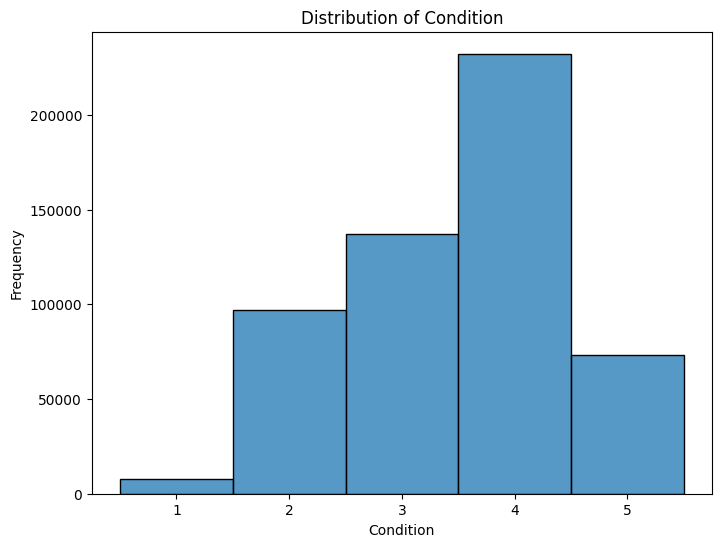

In [992]:
#Plotting the distribution of 'condition'
plt.figure(figsize=(8, 6))
sns.histplot(car_df['condition'].dropna(), discrete=True)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

#### As the data is numeric it appears to be normally distributed, we will use the Mean to imoute the missing values:

In [993]:
#Imputing missing values in the 'condition' column with the mean
condition_mean = car_df['condition'].mean()
car_df['condition'].fillna(condition_mean, inplace=True)

#Checking if there are any remaining missing values
missing_values_after_imputation = car_df['condition'].isnull().sum()
print("Missing values in 'condition' after imputation:", missing_values_after_imputation)

Missing values in 'condition' after imputation: 0


#### Imputing missing values for 'odometer'

Plotting the distribution of odemeter to see if we should use mean or meadian to impute the missing values.

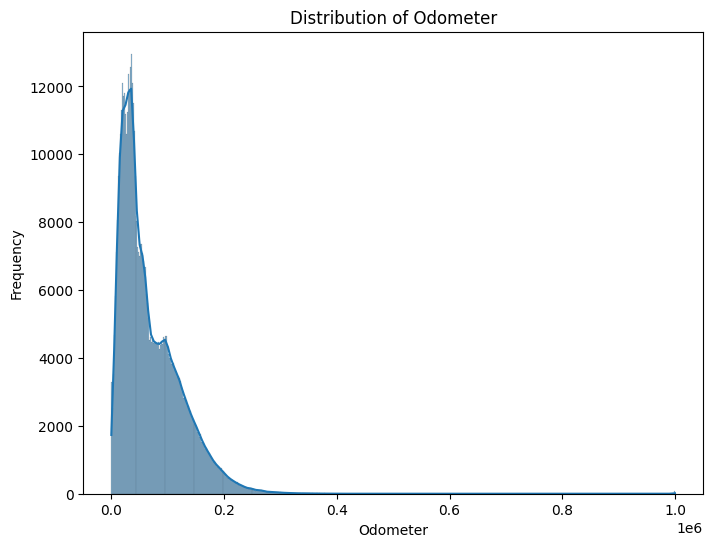

In [994]:
# Plotting the distribution of 'odometer'
plt.figure(figsize=(8, 6))
sns.histplot(car_df['odometer'].dropna(), kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

As the data is numeric it appears to be skewed to the left, we will use the Median to impute the missing values:

In [995]:
#Imputing missing values in the 'odometer' column with the median
odometer_median = car_df['odometer'].median()
car_df['odometer'].fillna(odometer_median, inplace=True)

#Checking if there are any remaining missing values
missing_values_after_imputation = car_df['odometer'].isnull().sum()
print("Missing values in 'odometer' after imputation:", missing_values_after_imputation)

Missing values in 'odometer' after imputation: 0


#### Imputing missing values for 'color'

In [996]:
print("Data type of 'interior' column:", car_df['color'].dtype)

Data type of 'interior' column: object


As 'color' is a categorical variable, we use Mode to impute missing values:

In [997]:
#Calculating the mode of the 'color' column
color_mode = car_df['color'].mode()[0]

#Filling missing values in the 'color' column with the mode
car_df['color'].fillna(color_mode, inplace=True)

#Checking if there are any remaining missing values
missing_values_after_imputation = car_df['color'].isnull().sum()
print("Missing values in 'color' after imputation:", missing_values_after_imputation)

Missing values in 'color' after imputation: 0


#### Imputing missing values for 'interior'

In [998]:
print("Data type of 'interior' column:", car_df['interior'].dtype)

Data type of 'interior' column: object


As 'interior' is a categorical variable, we use the mode to impute missing values:

In [999]:
#Calculating the mode of the 'interior' column
interior_mode = car_df['interior'].mode()[0]

#Filling missing values in the 'interior' column with the mode
car_df['interior'].fillna(interior_mode, inplace=True)

#Checking if there are any remaining missing values
missing_values_after_imputation = car_df['interior'].isnull().sum()
print("Missing values in 'interior' after imputation:", missing_values_after_imputation)

Missing values in 'interior' after imputation: 0


#### Last check if there are still empty values left:

In [1000]:
#Checking for null values again to make sure there are no empty values left
car_df.isna().sum().sort_values(ascending=False)

year            0
brand           0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>vin</b></font></div>

In [1001]:
#Show the frequency of VINs
vin_frequency = car_df['vin'].value_counts()
print("Count and Frequency of VINs:\n", vin_frequency)

Count and Frequency of VINs:
 wbanv13588cz57827    5
1ftfw1cv5afb30053    4
wp0ca2988xu629622    4
5n1ar1nn2bc632869    4
wddgf56x78f009940    4
                    ..
1p3ew65g7yv603989    1
4t1bf28b1yu016829    1
jtdbt1231y0082703    1
jtddr32t8y0063746    1
1ftfw1et2eke87277    1
Name: vin, Length: 550296, dtype: int64


#### Due to the existence of non-unique VIN cells, aggregation becomes necessary to summarise information for multiple entries that share the same Vehicle Identification Number (VIN).

In [1002]:
#Find and aggregate rows for duplicate VINs
duplicate_vins = car_df[car_df.duplicated(subset='vin', keep=False)]
if not duplicate_vins.empty:
    aggregated_data = duplicate_vins.groupby('vin').agg({
        'sellingprice': 'mean',  #Aggregate selling prices
        'odometer': 'mean'       #Aggregate odometer readings
    }).reset_index()

    #Display the aggregated data for duplicate VINs
    print("\nAggregated data for duplicate VINs:\n", aggregated_data)
else:
    print("\nNo cars sold more than once.")



Aggregated data for duplicate VINs:
                     vin  sellingprice  odometer
0     19uua5663ya022038        1050.0  105425.5
1     19uua65596a059705        8350.0   89701.0
2     19uua66215a070166        7350.0  131726.0
3     19uua66228a015410       10350.0   91839.0
4     19uua66228a024043       12850.0   78782.5
...                 ...           ...       ...
8321  zamce39a370028781       25150.0   39039.5
8322  zamce39a460025306       15500.0   92555.5
8323  zamce39a470026893       23250.0   46107.5
8324  zamfe39a970030502       30250.0   27925.5
8325  zfbcfabh4ez025834       10850.0   11474.0

[8326 rows x 3 columns]


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Mapping and capitalising columns</b></font></div>

##### We've observed inconsistencies in the way brand names are written—some are in abbreviations or lack proper capitalisation. By mapping these brand names, we aim to unify them for consistency and ensure they are uniformly represented.

In [1003]:
#Showing the count of unique values in the 'brand' and 'body' columns prior to performing mapping and capitalisation, aiming to gain an initial understanding
print("Number of unique values in 'brand' column before mapping:", car_df['brand'].nunique())
print("Number of unique values in 'body' column before mapping:", car_df['body'].nunique())

Number of unique values in 'brand' column before mapping: 96
Number of unique values in 'body' column before mapping: 86


In [1004]:
#Dictionary containing mappings for 'brand' column values to standardise and correct inconsistencies
mapping_dict = {
    'brand': {'vw': 'Volkswagen', 'ford tk': 'Ford', 'ford truck': 'Ford', 'chev truck': 'Chevrolet',
              'dodge tk': 'Dodge', 'hyundai tk': 'Hyundai', 'bmw': 'BMW', 'mercedes-b': 'Mercedes-Benz',
              'mercedes': 'Mercedes-Benz', 'gmc': 'GMC', 'gmc truck': 'GMC', 'mazda tk': 'Mazda', 
              'landrover': 'Land Rover'},
}

#Apply mapping to the specified 'body' column
car_df['body'] = car_df['body'].replace(mapping_dict.get('body', {}))

#### While familiarising ourselves with the data, it became apparent that numerous body types, such as 'van', 'Van', 'Ram Van', etc., essentially represent the same body type and require consistent mapping. Predominantly, cars fall into SUV, Coupe, Convertible, Cab, or Van categories. Any remaining types have been classified under the 'Other' category.

In [1005]:
#Function designed to categorise various body types
def categorize_body(body_type):
    body_type = str(body_type).lower()  #Ensuring uniformity by converting to lowercase
    
    #Categorise body types based on certain keywords
    if 'suv' in body_type:
        return 'SUV'
    elif 'coupe' in body_type:
        return 'Coupe'
    elif 'convertible' in body_type:
        return 'Convertible'
    elif 'sedan' in body_type:
        return 'Sedan'
    elif 'cab' in body_type:
        return 'Cab'
    elif 'van' in body_type:
        return 'Van'
    else:
        return 'Other'

#Apply the 'categorize_body' function to the 'body' column in the 'car_df' DataFrame
car_df['body'] = car_df['body'].apply(categorize_body)

In [1006]:
#Conducting a midway check to assess the impact of mapping
columns_to_check = ['brand', 'body']

#Displaying the number of unique values before mapping in the specified columns
for column in columns_to_check:
    print(f"Number of unique values in '{column}' column before mapping:", car_df[column].nunique())

Number of unique values in 'brand' column before mapping: 96
Number of unique values in 'body' column before mapping: 7


#### At first glance it might seem that there has been no effect on the brand column, this is because there are still inconsistencies regarding capitalisation. This is also done for the other columns, not because it is necesarry but for uniformity.

In [1007]:
#Function to capitalise text within specified columns
def capitalise(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))
    return df

In [1008]:
#List of columns to capitalise
columns_to_capitalise = ['brand', 'model', 'trim', 'body', 'transmission', 'color', 'interior','seller']

#Applying the function to the specified columns
car_df = capitalise(car_df, columns_to_capitalise)

In [1009]:
#Showing the count of unique values in the 'brand' and 'body' columns after  mapping and capitalisation
print("Number of unique values in 'brand' column after mapping:", car_df['brand'].nunique())
print("Number of unique values in 'body' column after mapping:", car_df['body'].nunique())

Number of unique values in 'brand' column after mapping: 66
Number of unique values in 'body' column after mapping: 7


#### After mapping and capitalising, the number of unique 'brand' values reduced from 96 to 66, and 'body' values reduced from 86 to 7, indicating significant merging.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Duplicates</b></font></div>

In [1010]:
#Checking for duplicates
duplicates = car_df.duplicated().sum()

#Outputting information based on duplicate presence
if duplicates == 0:
    print("There are no duplicates in the dataset")
else:
    print("There are " + str(duplicates) + " duplicates in the dataset")

There are no duplicates in the dataset


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Cleaning Colours</b></font></div>

#### To clean the 'color' and 'interior' columns, similar colours have been categorised together, merging them under one category. Colours with lower frequencies have also been grouped into the 'Other' category for better classification and data clarity.

In [1011]:
#Display unique values in the 'color' column before cleaning
unique_colours_before_cleaning = car_df['color'].unique()
print(f"{unique_colours_before_cleaning}\n")

#Display count of each unique value in the 'color' column before cleaning
colour_counts_before_cleaning = car_df['color'].value_counts()
print(colour_counts_before_cleaning)

['White' 'Gray' 'Black' 'Red' 'Silver' 'Blue' 'Brown' 'Beige' 'Purple'
 'Burgundy' '—' 'Gold' 'Yellow' 'Green' 'Charcoal' 'Orange' 'Off-white'
 'Turquoise' 'Pink' 'Lime']

Black        111719
White        106673
Silver        83389
Gray          82857
Blue          51139
Red           43569
—             24685
Green         11382
Gold          11342
Beige          9222
Burgundy       8972
Brown          6717
Orange         2078
Purple         1561
Off-white      1449
Yellow         1285
Charcoal        479
Turquoise       236
Pink             42
Lime             15
Name: color, dtype: int64


In [1012]:
#Display unique values in the 'interior' column before cleaning
unique_interiors_before_cleaning = car_df['interior'].unique()
print(f"{unique_interiors_before_cleaning}\n")

#Display unique values in the 'interior' column before cleaning
count_interiors_before_cleaning = car_df['interior'].value_counts()
print(count_interiors_before_cleaning)

['Black' 'Beige' 'Tan' '—' 'Gray' 'Brown' 'Burgundy' 'White' 'Silver'
 'Off-white' 'Blue' 'Red' 'Yellow' 'Green' 'Purple' 'Orange' 'Gold']

Black        245074
Gray         178578
Beige         59758
Tan           44093
—             17076
Brown          8640
Red            1359
Blue           1138
Silver         1099
Off-white       480
Purple          339
Gold            324
White           252
Green           245
Burgundy        191
Orange          145
Yellow           20
Name: interior, dtype: int64


In [1013]:
#Outer function 'clean_colours' encapsulates the entire process of cleaning the 'color' and 'interior' columns
def clean_colours(df):
    
    #Inner function 'clean_colour_data' is dedicated to performing detailed tasks related to colour cleaning
    def clean_colour_data(col):
        # Define mapping for similar colours to be merged and categorised
        similar_colours = {
            'Burgundy': 'Red',
            'Charcoal': 'Black',
            'Off-white': 'White',
            'Gray': 'Silver',
            'Turquoise': 'Blue',
            '—': 'Other',
        }

        #Categorise colours as per the specified categories
        col.replace(similar_colours, inplace=True)
        
        #For the 'interior' column, categorise other colours into the 'Other' category excluding Red, White, and Blue
        if col.name == 'interior':
            col[col.isin(['Silver', 'Black', 'Beige', 'Tan']) == False] = 'Other'
        
        #For the 'color' column, merge Beige and Tan into a single category 'Beige/Tan'
        if col.name == 'color':
            col[col.isin(['Beige', 'Tan'])] = 'Beige/Tan'
            #Categorise other colours into the 'Other' category
            col[col.isin(['Silver', 'Black', 'Red', 'White', 'Blue']) == False] = 'Other'

    #Clean the 'color' column using the inner function 'clean_colour_data'
    clean_colour_data(df['color'])

    #Clean the 'interior' column using the inner function 'clean_colour_data'
    clean_colour_data(df['interior'])


In [1014]:
#Applying the function to clean the 'color' and 'interior' columns
clean_colours(car_df)

/var/folders/65/5zkp1bys09s2tm2tg0bqn9wc0000gn/T/ipykernel_10194/3568478063.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col.isin(['Beige', 'Tan'])] = 'Beige/Tan'
/var/folders/65/5zkp1bys09s2tm2tg0bqn9wc0000gn/T/ipykernel_10194/3568478063.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col.isin(['Silver', 'Black', 'Red', 'White', 'Blue']) == False] = 'Other'
/var/folders/65/5zkp1bys09s2tm2tg0bqn9wc0000gn/T/ipykernel_10194/3568478063.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [1015]:
#Show unique colours after cleaning in the 'color' column
unique_colours_after_cleaning = car_df['color'].unique()
print("Unique colours after cleaning:")
print(unique_colours_after_cleaning)

#Show count of each unique colour after cleaning in the 'color' column
colour_counts_after_cleaning = car_df['color'].value_counts()
print("\nCount of each unique colour after cleaning:")
print(colour_counts_after_cleaning)

#Display unique interior colours after cleaning in the 'interior' column
unique_interiors_after_cleaning = car_df['interior'].unique()
print("\nUnique interior colours after cleaning:")
print(unique_interiors_after_cleaning)

#Display count of each unique interior colour after cleaning in the 'interior' column
count_interiors_after_cleaning = car_df['interior'].value_counts()
print("\nCount of each interior colour after cleaning:")
print(count_interiors_after_cleaning)

Unique colours after cleaning:
['White' 'Silver' 'Black' 'Red' 'Blue' 'Other']

Count of each unique colour after cleaning:
Silver    166246
Black     112198
White     108122
Other      68329
Red        52541
Blue       51375
Name: color, dtype: int64

Unique interior colours after cleaning:
['Black' 'Beige' 'Tan' 'Other' 'Silver']

Count of each interior colour after cleaning:
Black     245074
Silver    179677
Beige      59758
Tan        44093
Other      30209
Name: interior, dtype: int64


#### Summary of Changes:
#### - Colour Column: Reduced unique colours from 20 to 6.
#### - Interior Column: Condensed unique colours from 17 to 5.
#### Both the 'color' and 'interior' columns have been updated to enhance clarity and consistency in color representation. Similar colors have been grouped and infrequent ones categorized for better data analysis.

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 3</span>
    <h1 style="font-size: 30px;">Limiting the number of unique values</h1>
</div>

### 3.2 Cleaning the states aka looking at frequency

In [1016]:
unique_states = car_df['state'].unique()
print(unique_states)

['ca' 'tx' 'pa' 'mn' 'az' 'wi' 'tn' 'md' 'fl' 'ne' 'nj' 'nv' 'oh' 'mi'
 'ga' 'va' 'sc' 'nc' 'in' 'il' 'co' 'ut' 'mo' 'ny' 'ma' 'pr' 'or' 'la'
 'wa' 'hi' 'qc' 'ab' 'on' 'ok' 'ms' 'nm' 'al' 'ns']


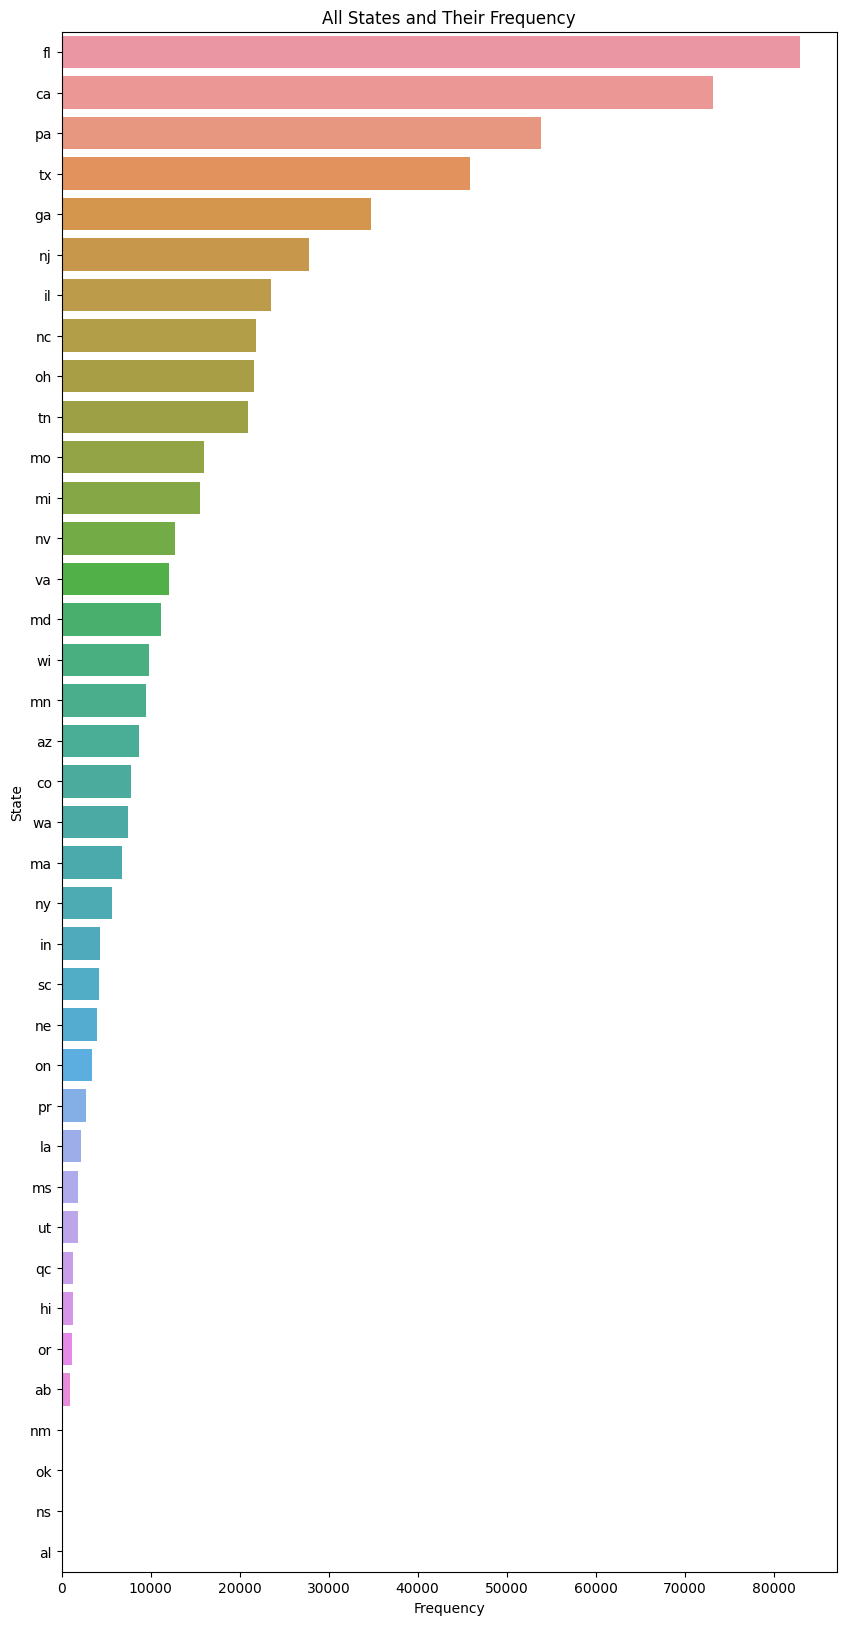

In [1017]:
plt.figure(figsize=(10, 20))

# Plotting all states based on frequency
sns.countplot(y='state', data=car_df, order=car_df['state'].value_counts().index)
plt.title('All States and Their Frequency')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

#### The dataset comprises entries from 38 different states. Among these states, Florida, California, and Pennsylvania appear most frequently, while Alabama, Nova Scotia (Canada), and Oklahoma have the lowest frequencies in the dataset.

### Cleaning the 'sellers' column: Only looking at the top 50 sellers

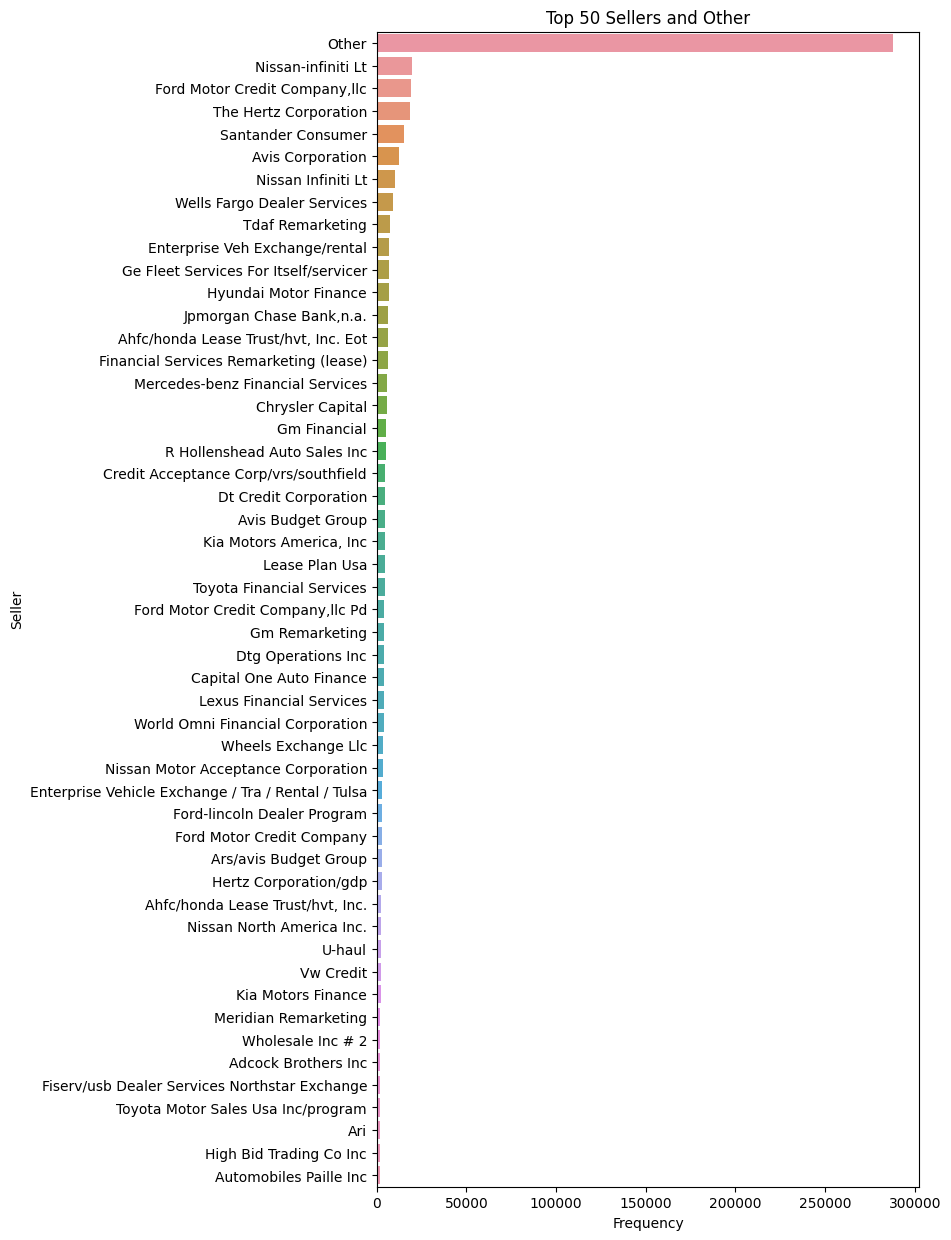

In [1019]:
plt.figure(figsize=(7, 15))

#Selecting the top 50 sellers by frequency
top_50_sellers = car_df['seller'].value_counts().nlargest(50).index.tolist()

#Updating sellers that are not in the top 50 to 'Other'
car_df['seller'] = car_df['seller'].apply(lambda x: x if x in top_50_sellers else 'Other')

#Plotting the top 50 sellers based on frequency
sns.countplot(y='seller', data=car_df, order=car_df['seller'].value_counts().index)
plt.title('Top 50 Sellers and Other')
plt.xlabel('Frequency')
plt.ylabel('Seller')
plt.show()

#### Chaning all sellers that are not in the top 50 to 'Other'.

In [1020]:
#Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['seller'] = car_df['seller'].apply(lambda x: x if x in top_50_sellers else 'other')

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 4</span>
    <h1 style="font-size: 30px;">Exploratory Data Analysis</h1>
</div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Boxplots for numericals</b></font></div>

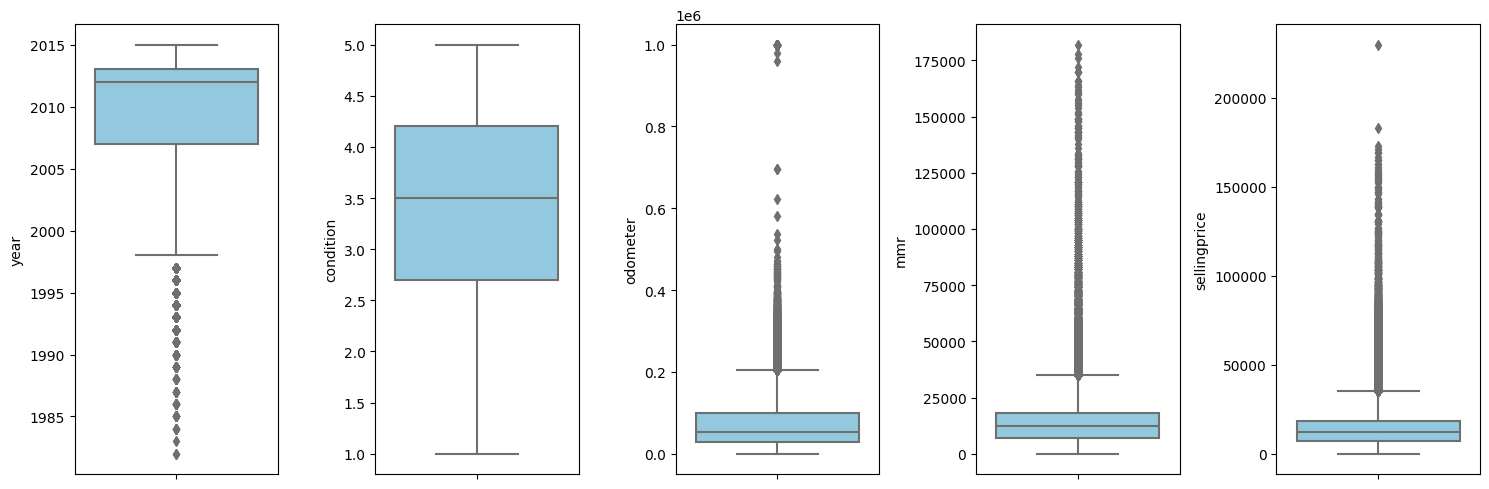

In [1021]:
#Define numerical features for boxplots
num_features = numerical_col 

#Set up the figure size for the boxplot
plt.figure(figsize=(15, 5))  #Adjust the width and height as required

#Assign numerical features to 'box' variable for iteration
box = num_features  
for i in range(0, len(box)):
    plt.subplot(1, len(box), i + 1)  #Create subplots based on the number of numerical features
    sns.boxplot(y=car_df[box[i]], color='skyblue', orient='v')  #Generate boxplot for each numerical feature

plt.tight_layout()  #Adjust layout for better visualisation
plt.show()


#### Major outliers are very clear in the 'odometer', 'mmr', and 'sellingprice' columns on the box plot. Additionally, somewhat skewed distributions are evident in the 'year', 'odometer', and 'sellingprice' columns.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>KDE Plot for numericals</b></font></div>

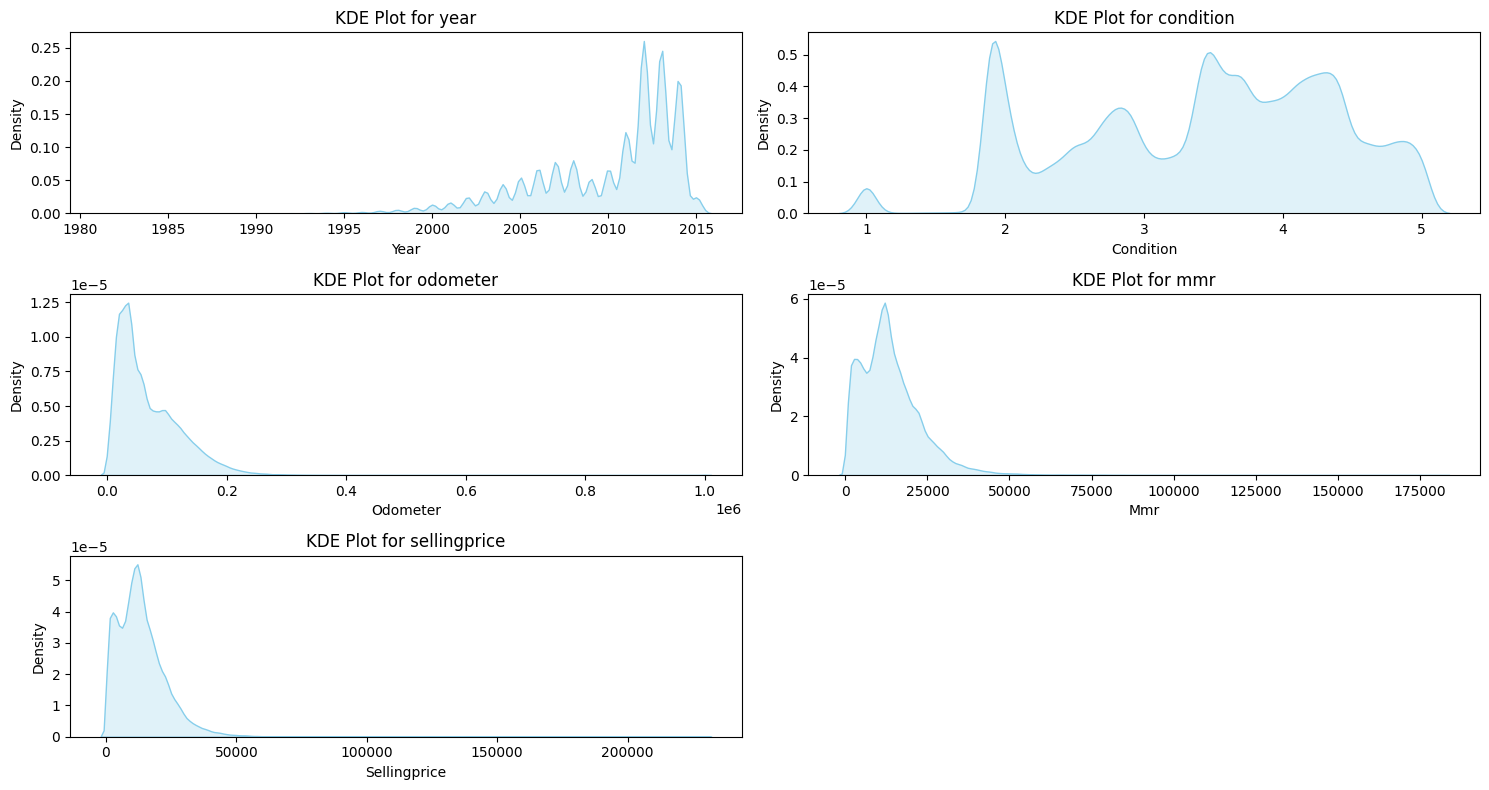

In [1022]:
#Set the figure size for the KDE plots
plt.figure(figsize=(15, 8))

#Define the number of rows and columns for subplots based on the number of numerical features
num_cols = len(num_features)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows required

#Iterate through each numerical feature and plot its Kernel Density Estimate (KDE)
for i, feature in enumerate(num_features):
    plt.subplot(num_rows, 2, i + 1)  #Arrange the plot with 2 columns per row
    sns.kdeplot(data=car_df[feature], color='skyblue', fill=True)  #Generate KDE plot for the feature
    plt.title(f'KDE Plot for {feature}')  #Set title for the subplot
    plt.xlabel(f'{feature.capitalize()}')  #Set feature with capitalised first letter for x-axis
    plt.ylabel('Density')  #Label y-axis as 'Density'

plt.tight_layout()
plt.show()


#### The 'year', 'mmr', and 'sellingprice' columns appear skewed, especially the 'odometer' column. The 'condition' column displays a multimodal distribution trend with an approach towards normality. 

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Violin Plot for numericals</b></font></div>

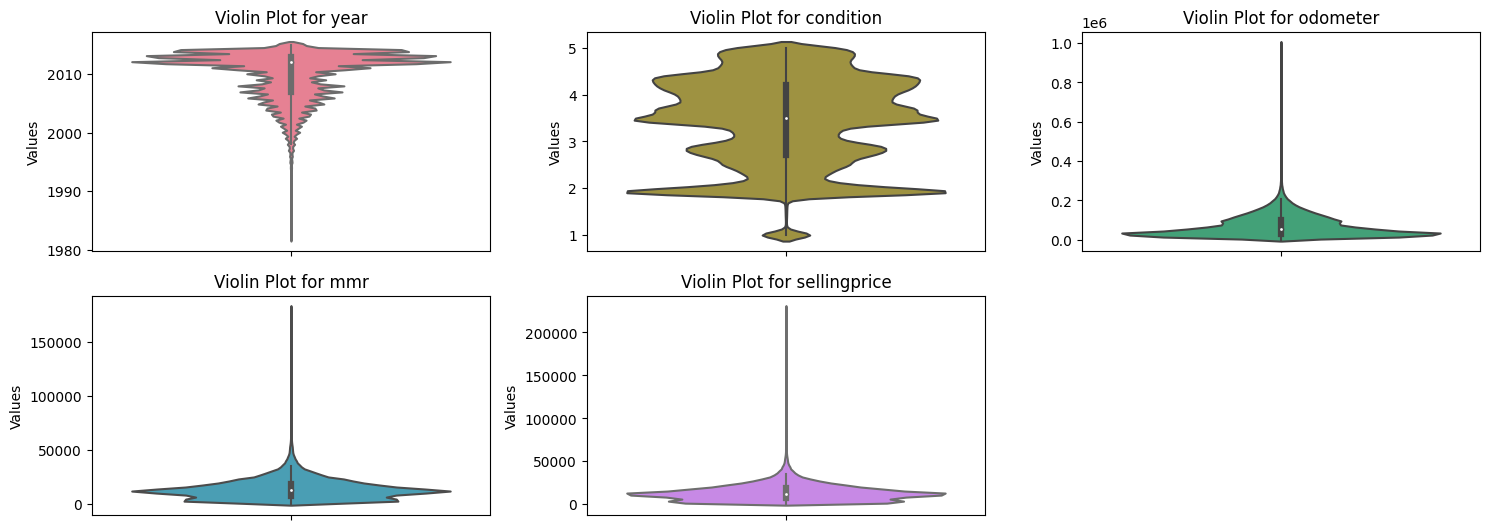

In [1023]:
#Set a custom colour palette for the violins
custom_palette = sns.color_palette("husl", n_colors=len(num_features))

#Set the figure size for the violin plots
plt.figure(figsize=(15, 8))

#Iterate through each numerical feature and generate enhanced violin plots
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(y=car_df[num_features[i]], palette=[custom_palette[i]], split=True)  #Create violin plot
    plt.title(f'Violin Plot for {feature}')  
    plt.xlabel('')  # Set blank label for x-axis
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


#### The violin plots further validate the observations derived from the box and KDE distribution plots.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Counting categroicals</b></font></div>

In [1024]:
#Function to categorise values not in the top N categories as 'Others'.
def categorise_top(dataframe, column_name, top_n):
    """
    Parameters:
    dataframe (DataFrame): The car_df containing the data.
    column_name (str): The name of the column containing categorical information.
    top_n (int): The number of top categories to consider.

    Returns:
    DataFrame: DataFrame with values not in the top N categories categorised as 'Others'. 
    """
    top_values = dataframe[column_name].value_counts().head(top_n).index.tolist()
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x if x in top_values else 'Others')
    return dataframe

In [1025]:
#Function to create a count plot
def plot_countplot(data, column, colour, fig_width=15, fig_height=3):
    """
    Function to generate a count plot for a specific column in the dataset.

    Parameters:
    data (DataFrame): The car_df containing the data.
    column (str): The name of the column to create the count plot.
    colour (str): The colour for the count plot bars.
    fig_width (int, optional): Width of the figure. Default is 15.
    fig_height (int, optional): Height of the figure. Default is 3.

    """
    plt.figure(figsize=(fig_width, fig_height))
    plt.subplot(1, 3, 1)
    sns.countplot(x=data[column], color=colour)  #Generate count plot
    plt.xticks(rotation=45)  #Rotate x-axis labels for better readability
    plt.title(f'Count of {column.capitalize()}')
    plt.tight_layout()

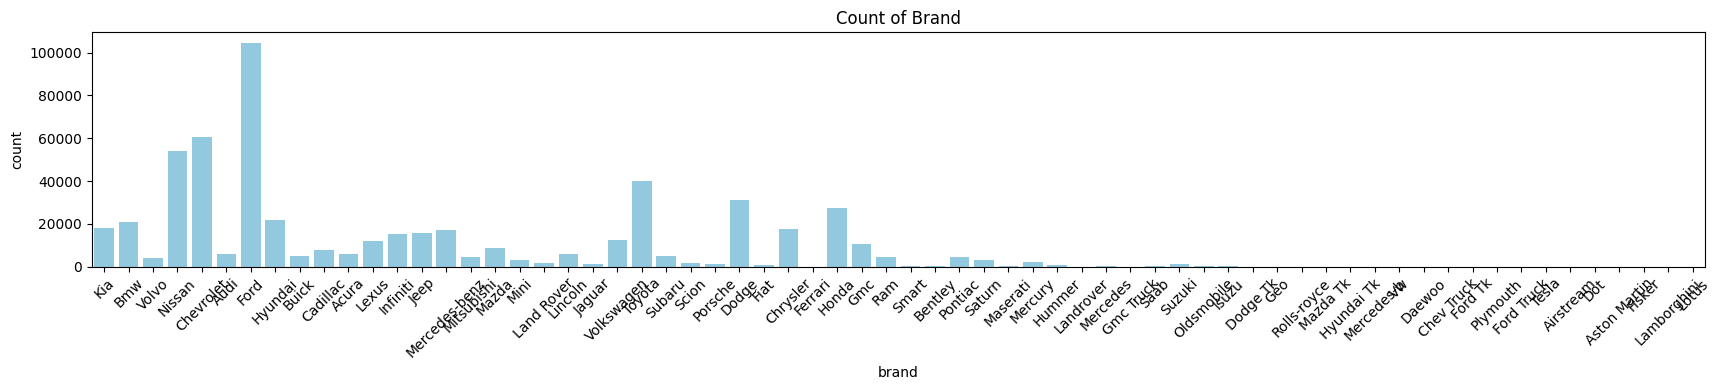

In [1026]:
#Plot brand frequency using skyblue bars in a figure sized 50 units wide and 4 units high for the 'brand' column
plot_countplot(car_df, 'brand', 'skyblue', fig_width=50, fig_height=4)

#### The plot visually shows what we've seen after mapping the brands. Despite our efforts, it still needs categorisation to optimise modelling later. This is done by getting the top 10 car brands and putting the rest into the Others category.

In [1027]:
#Select the top 10 brands for categorisation
top_n = 10  
car_df = categorise_top(car_df, 'brand', top_n)  #Categorise 'brand' column, grouping values beyond top 10 as 'Others'
print("Updated 'brand' column with top", top_n, "brands and 'Others':")
print(car_df['brand'].value_counts())

Updated 'brand' column with top 10 brands and 'Others':
Others       163439
Ford         104298
Chevrolet     60587
Nissan        54017
Toyota        39966
Dodge         30955
Honda         27351
Hyundai       21836
Bmw           20793
Kia           18084
Chrysler      17485
Name: brand, dtype: int64


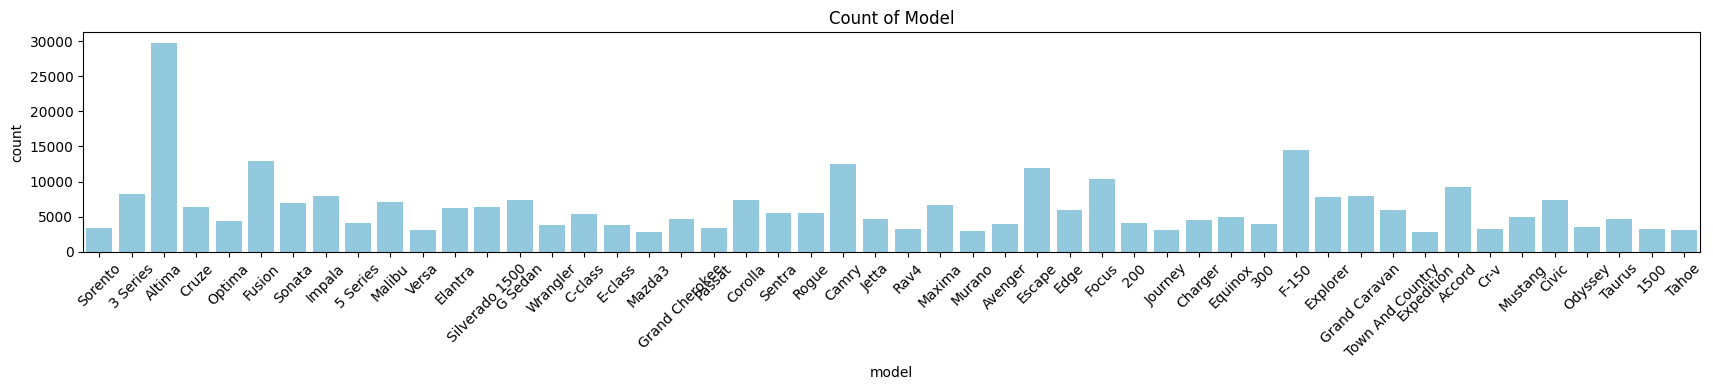

In [1028]:
#Get the top 20 most frequent values in the 'model' column
top_20_models = car_df['model'].value_counts().head(50).index.tolist()

#Filter the DataFrame to include only the top 20 models
filtered_car_df = car_df[car_df['model'].isin(top_20_models)]

#Plot the count of the top 20 models using the plot_countplot function
plot_countplot(filtered_car_df, 'model', 'skyblue', fig_width=50, fig_height=4)

#### Just like the brand plot, the model also needs to be narrowed down for moddeling later, this is done in the same way as with the brands.

In [1029]:
#Select the top 10 models for categorisation
top_n = 10
car_df = categorise_top(car_df, 'model', top_n)
print("Updated 'model' column with top", top_n, "models and 'Others':")
print(car_df['model'].value_counts())

Updated 'model' column with top 10 models and 'Others':
Others           433540
Altima            29748
F-150             14479
Fusion            12946
Camry             12549
Escape            11893
Focus             10399
Accord             9155
3 Series           8204
Impala             7957
Grand Caravan      7941
Name: model, dtype: int64


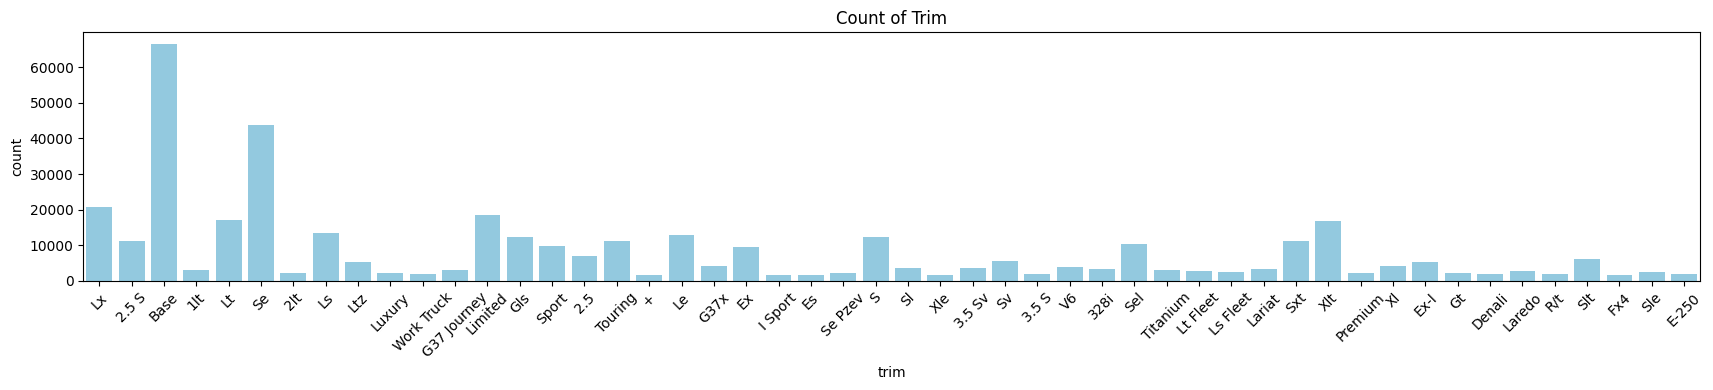

In [1030]:
#Get the top 20 most frequent values in the 'trim' column
top_20_models = car_df['trim'].value_counts().head(50).index.tolist()

#Filter the DataFrame to include only the top 20 models
filtered_car_df = car_df[car_df['trim'].isin(top_20_models)]

#Plot the count of the top 20 models using the plot_countplot function
plot_countplot(filtered_car_df, 'trim', 'skyblue', fig_width=50, fig_height=4)

#### There are a lot of trims, therefore we just plotted the top 20. And just like the plots before, the trim also needs to be narrowed down for moddeling later, this is done in the same way as with the brands.

In [1031]:
#Select the top 10 models for categorisation
top_n = 10
car_df = categorise_top(car_df, 'trim', top_n)
print("Updated 'trim' column with top", top_n, "trims and 'Others':")
print(car_df['trim'].value_counts())

Updated 'trim' column with top 10 trims and 'Others':
Others     324670
Base        66493
Se          43691
Lx          20782
Limited     18369
Lt          16984
Xlt         16745
Ls          13535
Le          12929
Gls         12333
S           12280
Name: trim, dtype: int64


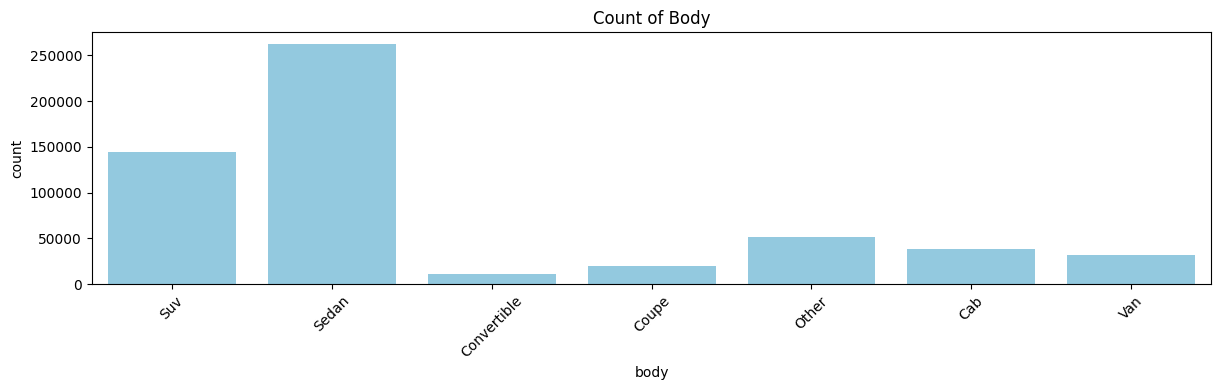

In [1032]:
#Plot body frequency using skyblue bars in a figure sized 35 units wide and 4 units high for the 'body' column
plot_countplot(car_df, 'body', 'skyblue', fig_width=35, fig_height=4)

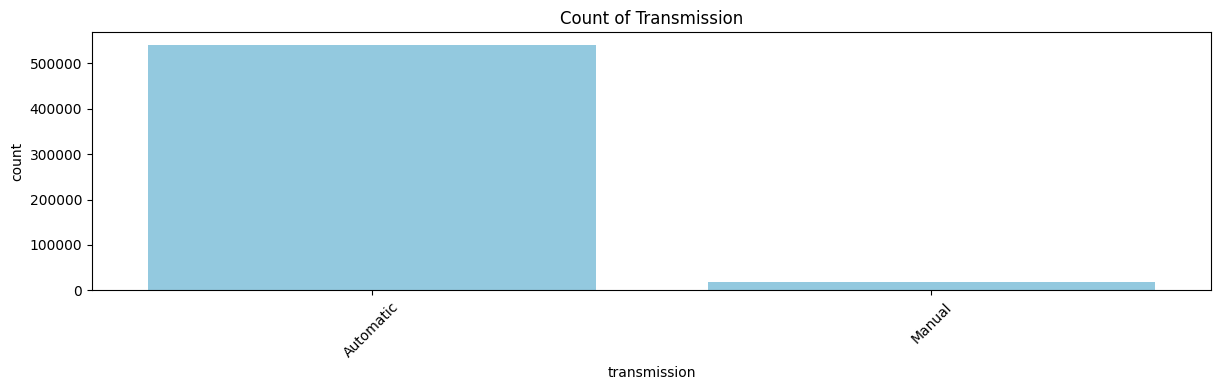

In [1033]:
#Plot transmission frequency using skyblue bars in a figure sized 35 units wide and 4 units high for the 'transmission' column
plot_countplot(car_df, 'transmission', 'skyblue', fig_width=35, fig_height=4)

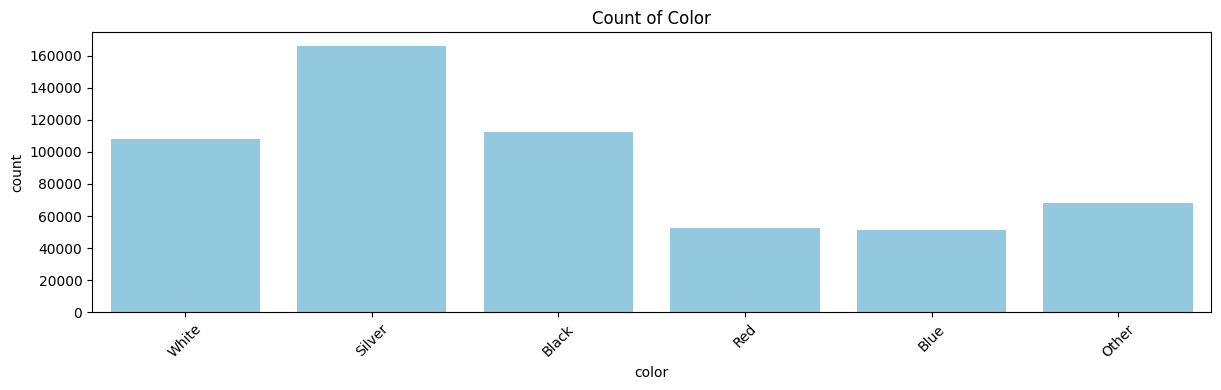

In [1034]:
#Plot color frequency using skyblue bars in a figure sized 35 units wide and 4 units high for the 'color' column
plot_countplot(car_df, 'color', 'skyblue', fig_width=35, fig_height=4)

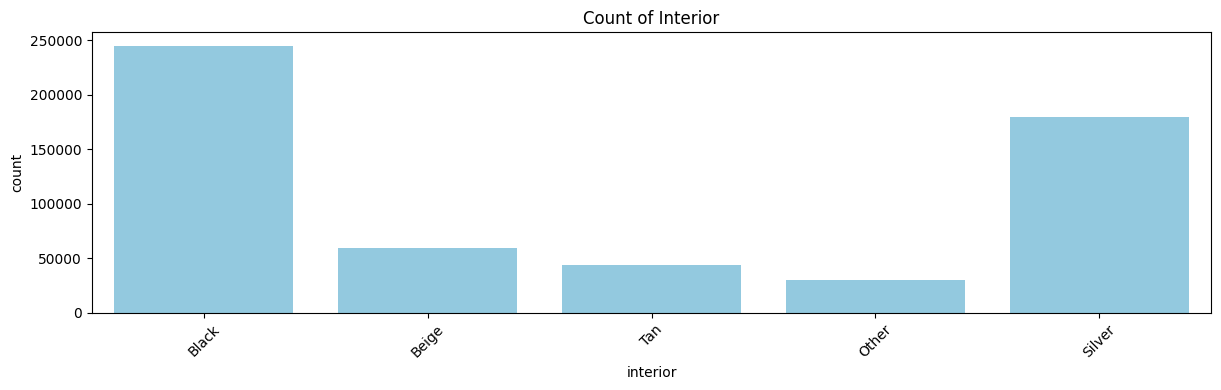

In [1035]:
#Plot interior frequency using skyblue bars in a figure sized 35 units wide and 4 units high for the 'interior' column
plot_countplot(car_df, 'interior', 'skyblue', fig_width=35, fig_height=4)

#### The body, transmission, color, and interior columns have already been categorised and show easy-to-see plots:
#### - Most cars are sedan, followed by SUVs and cab's
#### - Almost all of the cars are automatic
#### - Most cars have a silver, black, or white colour
#### - When it comes to the interior, it consists of either black, beige/tan, or silver

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Scatter matrix</b></font></div>

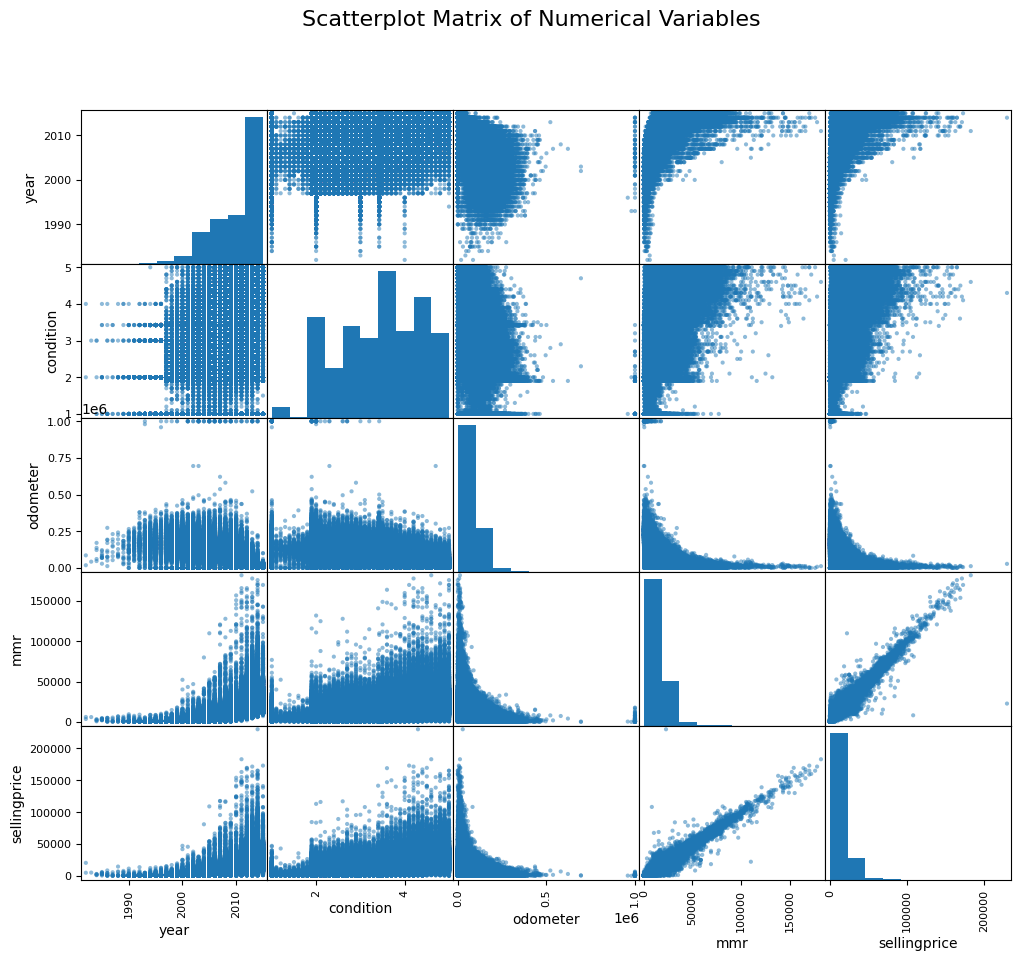

In [1036]:
#Calculating the correlation matrix for numerical features
numerical_corr = car_df[num_features].corr()

#Generating a scatterplot matrix
scatter_matrix(car_df[num_features], figsize=(12, 10))
plt.suptitle('Scatterplot Matrix of Numerical Variables', fontsize=16)
plt.show()

#### From the scatter matrix, we can see that 'mmr' has a linear correlation with 'sellingprice'. Additionally, 'year' and 'odometer' have a strong inverse correlation.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Comparing categories with sellingprice</b></font></div>

In [1037]:
#Function to identify the top 10 selling prices
def top_10_sellingprice(df, categorical_column, numerical_column):
    #Extract the top 10 categories based on their frequency in the specified categorical column
    top_categories = df[categorical_column].value_counts().head(10).index.tolist()
    
    #Filter the DataFrame to include data exclusively for the top categories in the specified column
    top_categories_data = df[df[categorical_column].isin(top_categories)]
    
    #Generate a bar plot to compare numerical data across the top categories
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorical_column, y=numerical_column, data=top_categories_data)
    
    plt.title(f'Comparison of {numerical_column.capitalize()} by {categorical_column.capitalize()} (Top 10)', fontsize=16)
    plt.xlabel(f'{categorical_column.capitalize()}')
    plt.ylabel(f'{numerical_column.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

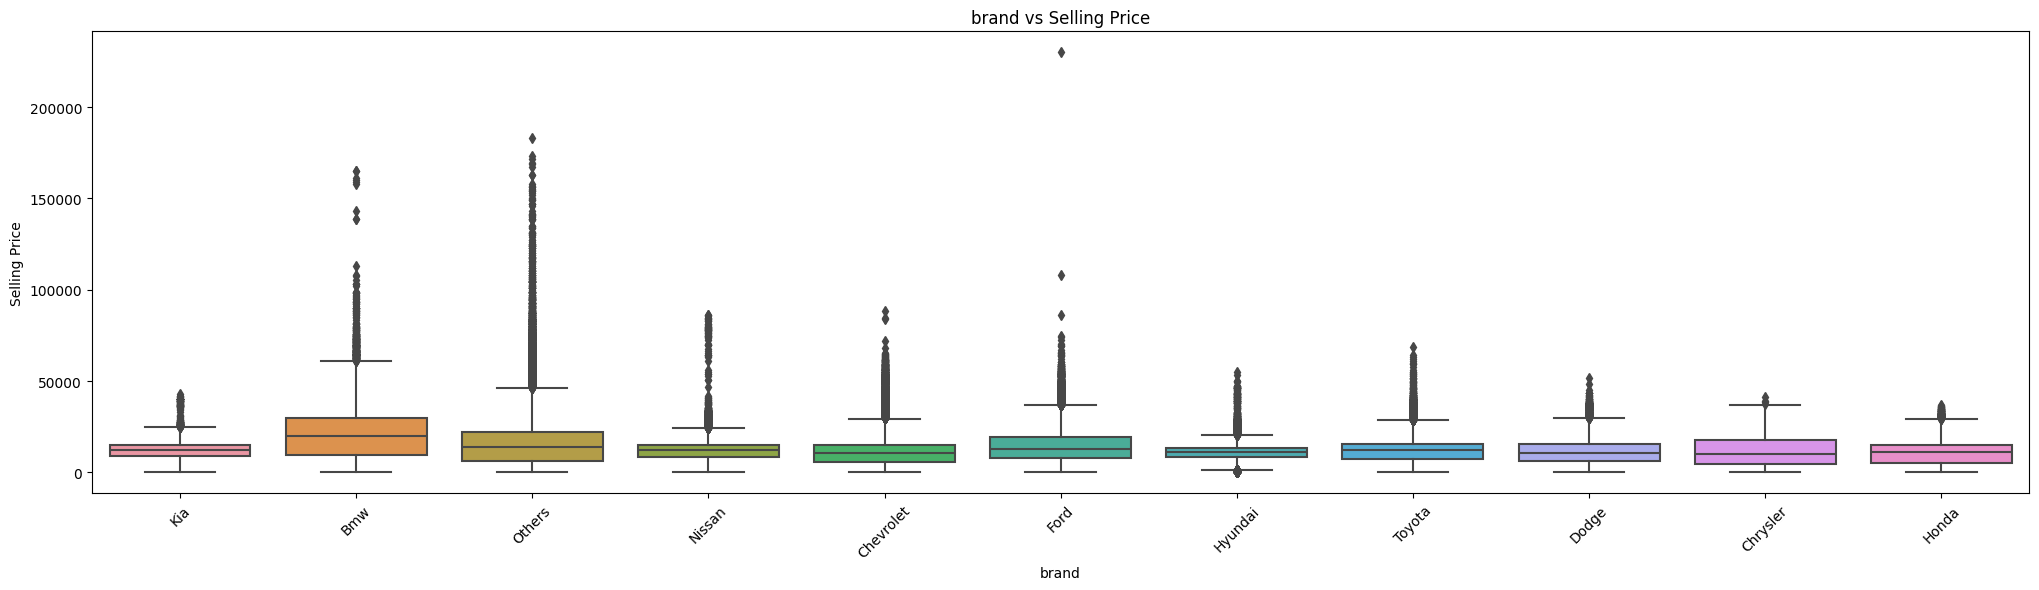

In [1038]:
#Selecting 'brand' to visualise its relationship with 'sellingprice'
categorical_column = 'brand'

#Creating a box plot to show 'sellingprice' distribution across different categories of 'brand'
plt.figure(figsize=(25, 6))
sns.boxplot(x=categorical_column, y='sellingprice', data=car_df)
plt.title(f'{categorical_column} vs Selling Price')
plt.xlabel(categorical_column)
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

#### From the plot we can see that BMW and Ford have the biggest outliers.

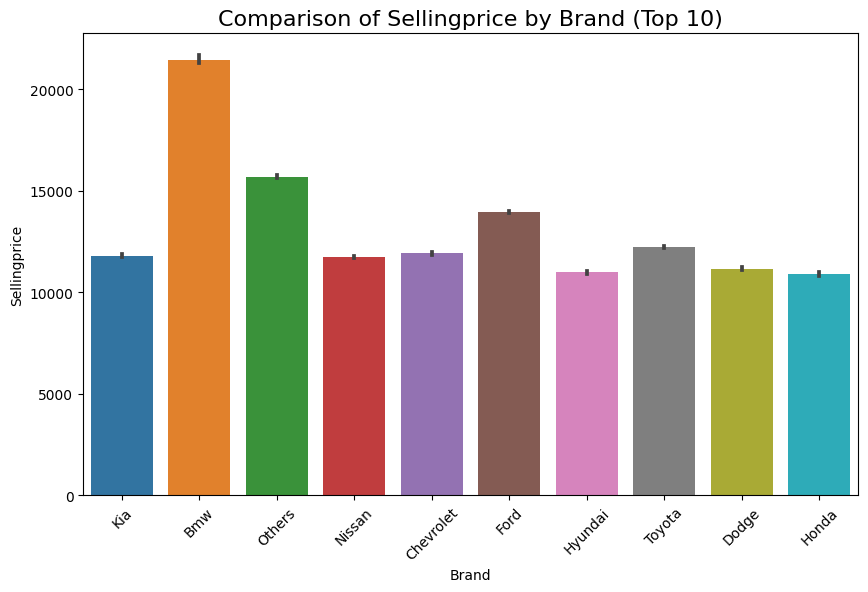

In [1039]:
#Using the function to visualise the top 10 sellingprice by brand
top_10_sellingprice(car_df, 'brand', 'sellingprice')

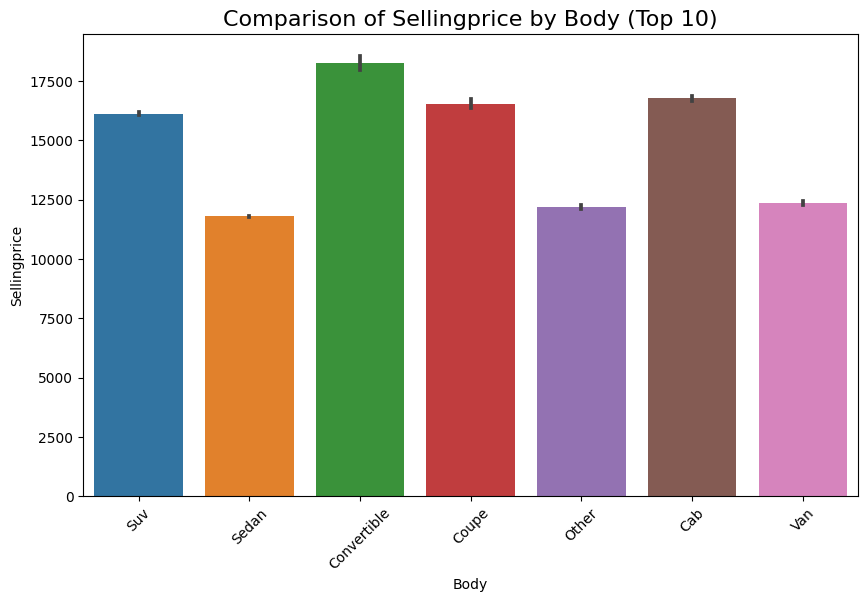

In [1040]:
#Using the function to visualise the top 10 sellingprice by body
top_10_sellingprice(car_df, 'body', 'sellingprice')

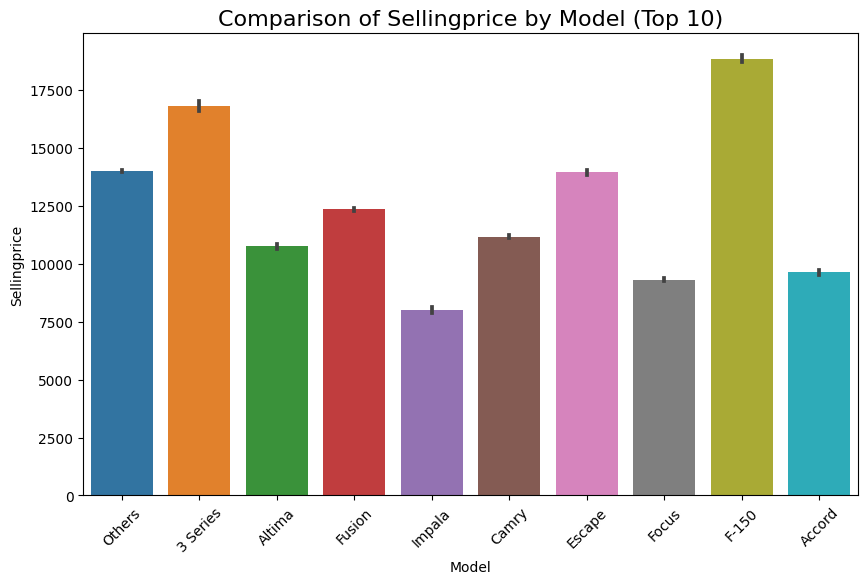

In [1041]:
#Using the function to visualise the top 10 sellingprice by model
top_10_sellingprice(car_df, 'model', 'sellingprice')

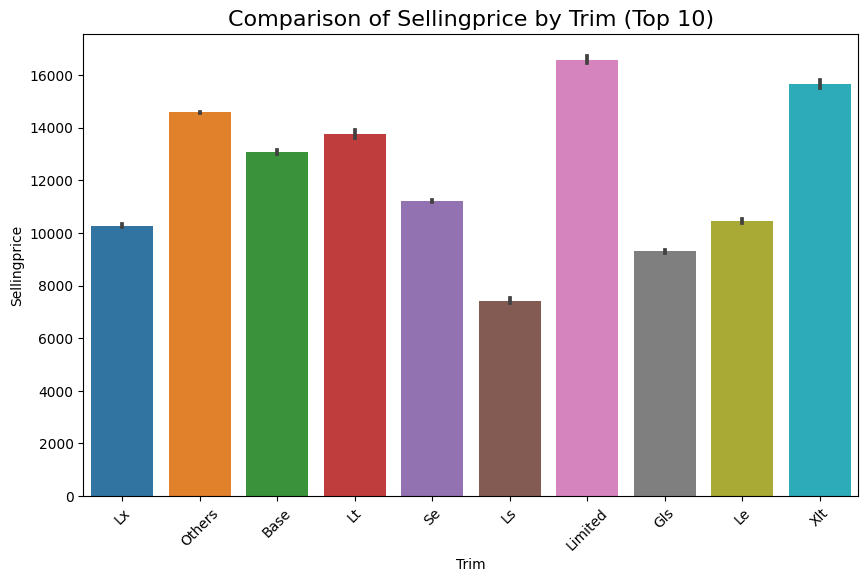

In [1042]:
#Using the function to visualise the top 10 sellingprice by trim
top_10_sellingprice(car_df, 'trim', 'sellingprice')

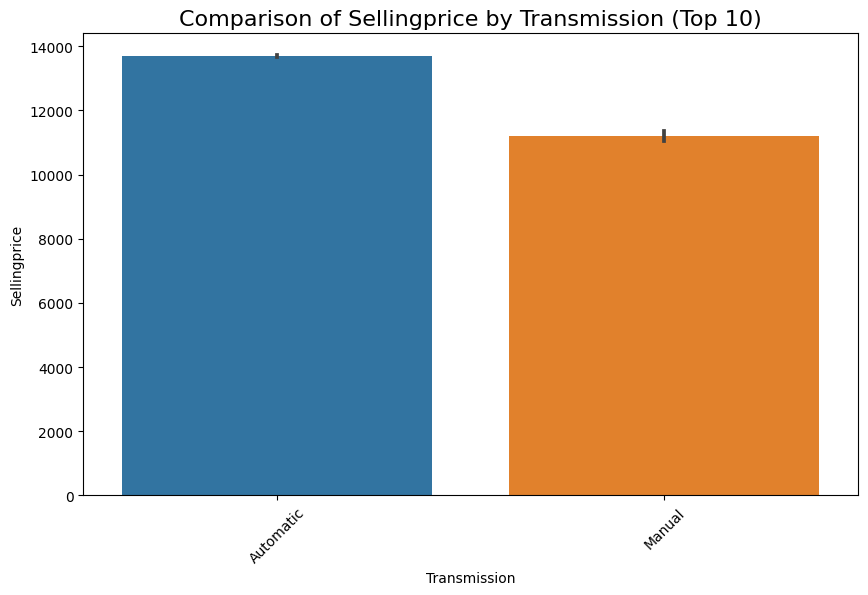

In [1043]:
#Using the function to visualise the top 10 sellingprice by transmission
top_10_sellingprice(car_df, 'transmission', 'sellingprice')

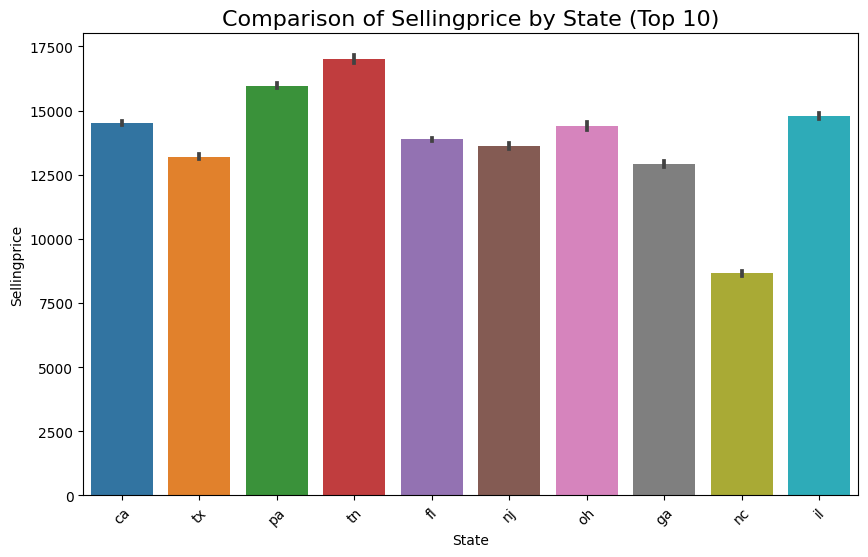

In [1044]:
#Using the function to visualise the top 10 sellingprice by state
top_10_sellingprice(car_df, 'state', 'sellingprice')

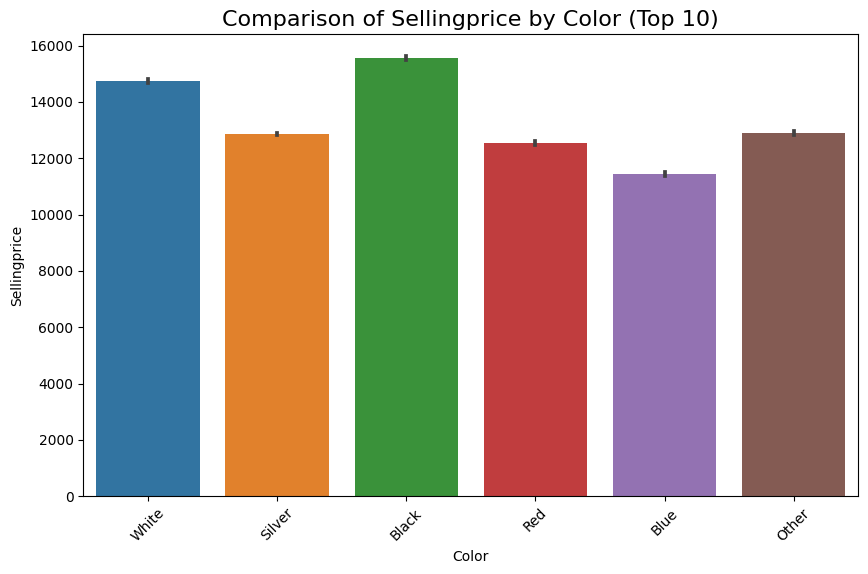

In [1045]:
#Using the function to visualise the top 10 sellingprice by color
top_10_sellingprice(car_df, 'color', 'sellingprice')

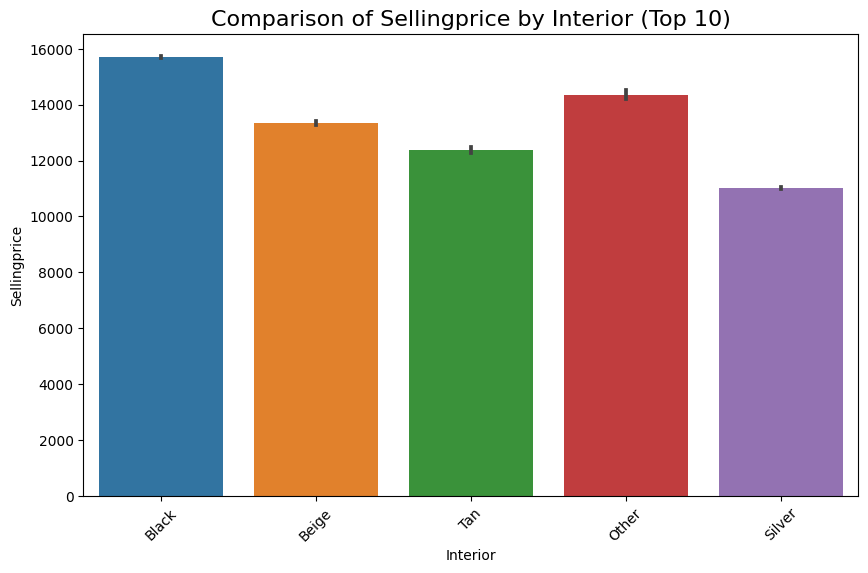

In [1046]:
#Using the function to visualise the top 10 sellingprice by interior
top_10_sellingprice(car_df, 'interior', 'sellingprice')

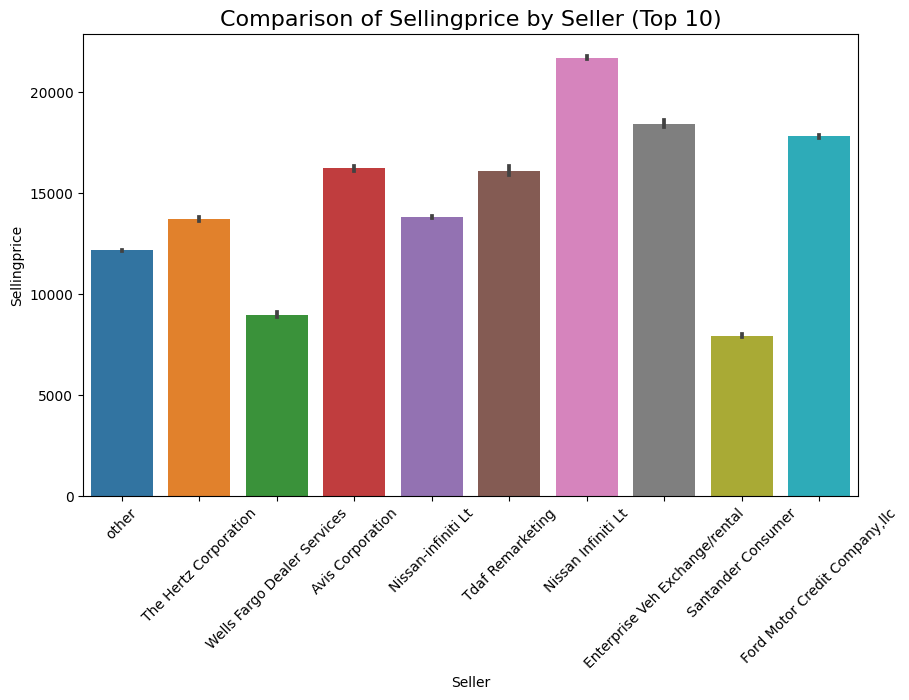

In [1047]:
#Using the function to visualise the top 10 sellingprice by seller
top_10_sellingprice(car_df, 'seller', 'sellingprice')

#### Based on the previous graphs, we have identified the following trends:
#### - Ford is the most frequently sold car, but BMW sells for a higher price.
#### - Convertibles have a higher selling price among body types, but the difference between the types is not significant.
#### - The limited trim has the highest selling price compared to other trims, while LS seems to have a lower price.
#### - Automatic transmission is the most popular among buyers.
#### - Selling prices are relatively consistent across states, colors, and interiors.
#### - Nissan Infiniti Lt seller has the highest selling price among sellers.

In [1048]:
#Calculate descriptive statistics for selling prices
price_stats = car_df['sellingprice'].describe()

#Showing the statistics
print("Summary statistics for selling prices:\n")
print(price_stats)

#Finding the highest and lowest prices
highest_price = car_df['sellingprice'].max()
lowest_price = car_df['sellingprice'].min()

#Showing the highest and lowest prices
print(f"\nHighest price: ${highest_price}\n")
print(f"Lowest price: ${lowest_price}\n")

Summary statistics for selling prices:

count    558811.000000
mean      13611.262461
std        9749.656919
min           1.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

Highest price: $230000

Lowest price: $1



#### The selling price statistics reveal a range from $1 to $230,000, with a mean of $13,611.26 and a standard deviation of $9,749.66. Notably, the minimum selling price of $1 appears strange, indicating a unique case, but anything is possible when it comes to auctions.

In [1049]:
# Display unique values in the condition column rounded to two decimal points
car_df['condition'].unique().round(2)
car_df['condition'].unique().round(2)

array([5.  , 4.5 , 4.1 , 4.3 , 1.  , 3.4 , 2.  , 4.2 , 3.  , 4.8 , 3.42,
       4.9 , 1.7 , 1.9 , 2.9 , 3.8 , 4.4 , 4.7 , 3.2 , 4.  , 2.5 , 3.7 ,
       3.9 , 3.1 , 2.8 , 4.6 , 3.6 , 3.5 , 2.6 , 2.1 , 2.2 , 2.7 , 2.4 ,
       3.3 , 2.3 , 1.5 , 1.6 , 1.8 , 1.2 , 1.4 , 1.1 , 1.3 ])

#### The unique values in the 'condition' column span from 1.0 to 5.0, indicating a probable rating scale reflecting different conditions of the cars, representing a range from poor to excellent quality.

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 4</span>
    <h1 style="font-size: 30px;">Feature Engineering</h1>
</div>

#### Several new features were generated, specifically:
#### - 'brand_model'
#### - 'new_saledate_format'
#### - 'car_age'
#### - 'mileage_per_year'
#### - 'market_price_deviation'

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>brand_model</b></font></div>

In [1050]:
#Creating a new column 'Brand_Model_Combination' by concatenating 'brand' and 'model'
car_df['brand_model'] = car_df['brand'] + '_' + car_df['model']

print(car_df['brand_model'])

0            Kia_Others
1            Kia_Others
2          Bmw_3 Series
3         Others_Others
4            Bmw_Others
              ...      
558806       Kia_Others
558807    Others_Others
558808       Bmw_Others
558809    Nissan_Altima
558810       Ford_F-150
Name: brand_model, Length: 558811, dtype: object


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>new_saledate_format</b></font></div>

In [1051]:
#Cleaning 'saledate' column and convert to datetime
car_df['saledate'] = pd.to_datetime(car_df['saledate'].str.replace(r' GMT[-+]\d{4} \(\w{3}\)', '', regex=True).str.strip(), errors='coerce')

#Creating 'new_saledate_format' column with desired format
car_df['new_saledate_format'] = car_df['saledate'].dt.strftime('%b %Y')

#Extracting date part and calculate time span
car_df['date_part'] = pd.to_datetime(car_df['saledate'].dt.strftime('%Y-%m-%d'), errors='coerce')
min_date = car_df['date_part'].min()
max_date = car_df['date_part'].max()

print(car_df[['saledate', 'new_saledate_format']])
print(car_df[['saledate', 'date_part']])
print(f"Min Date: {min_date}\nMax Date: {max_date}\nTime Span: {max_date - min_date}")

                  saledate new_saledate_format
0      2014-12-16 12:30:00            Dec 2014
1      2014-12-16 12:30:00            Dec 2014
2      2015-01-15 04:30:00            Jan 2015
3      2015-01-29 04:30:00            Jan 2015
4      2014-12-18 12:30:00            Dec 2014
...                    ...                 ...
558806 2015-07-09 07:00:00            Jul 2015
558807 2015-07-08 09:30:00            Jul 2015
558808 2015-07-08 09:30:00            Jul 2015
558809 2015-07-09 06:45:00            Jul 2015
558810 2015-05-28 05:30:00            May 2015

[558811 rows x 2 columns]
                  saledate  date_part
0      2014-12-16 12:30:00 2014-12-16
1      2014-12-16 12:30:00 2014-12-16
2      2015-01-15 04:30:00 2015-01-15
3      2015-01-29 04:30:00 2015-01-29
4      2014-12-18 12:30:00 2014-12-18
...                    ...        ...
558806 2015-07-09 07:00:00 2015-07-09
558807 2015-07-08 09:30:00 2015-07-08
558808 2015-07-08 09:30:00 2015-07-08
558809 2015-07-09 06:45:00 20

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>care_age</b></font></div>

In [1052]:
#Extracting the year of sale from 'saledate' and convert to datetime
car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors='coerce')
car_df['year_of_sale'] = car_df['saledate'].dt.year

#Calculating 'car_age' by subtracting the manufacture year from the year of sale
car_df['car_age'] = car_df['year_of_sale'] - car_df['year']

print(car_df[['saledate', 'year', 'year_of_sale', 'car_age']])

                  saledate  year  year_of_sale  car_age
0      2014-12-16 12:30:00  2015          2014       -1
1      2014-12-16 12:30:00  2015          2014       -1
2      2015-01-15 04:30:00  2014          2015        1
3      2015-01-29 04:30:00  2015          2015        0
4      2014-12-18 12:30:00  2014          2014        0
...                    ...   ...           ...      ...
558806 2015-07-09 07:00:00  2015          2015        0
558807 2015-07-08 09:30:00  2012          2015        3
558808 2015-07-08 09:30:00  2012          2015        3
558809 2015-07-09 06:45:00  2015          2015        0
558810 2015-05-28 05:30:00  2014          2015        1

[558811 rows x 4 columns]


#### An age of a car less than 0 seems highly improbable considering the dataset comprises used car prices. Therefore, these instances need examination, followed by appropriate action, such as imputation or deletion, to rectify the anomaly

In [1053]:
#Filtering for rows where 'car_age' is less than 0 and count the occurrences
negative_car_age_count = (car_df['car_age'] < 0).sum()

#Display the count of rows where 'car_age' is less than 0
print(f"Number of rows where car_age is less than 0: {negative_car_age_count}")

Number of rows where car_age is less than 0: 201


#### Given there are only 201 instances where the car's age is less than 0, the preferable action would be to remove these cases from the dataset

In [1054]:
#Filtering to keep rows where 'car_age' is greater than or equal to 0
car_df = car_df[car_df['car_age'] >= 0]

In [1055]:
#Count of rows after dropping rows with negative 'car_age'
row_count = len(car_df)
print(f"New row count: {row_count}")

New row count: 558610


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>mileage_per_year</b></font></div>

In [1056]:
#Calculating current year for reference
current_year = datetime.datetime.now().year

#Calculating mileage per year by dividing odometer reading by car age
car_df['mileage_per_year'] = car_df['odometer'] / car_df['car_age']


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>market-price-deviation</b></font></div>

In [1057]:
#Calculating deviation by subtracting 'mmr' from 'sellingprice'
car_df['market_price_deviation'] = car_df['sellingprice'] - car_df['mmr']

#Showing the DataFrame with the added 'market_price_deviation' column
print(car_df[['mmr', 'sellingprice', 'market_price_deviation']])

          mmr  sellingprice  market_price_deviation
2       31900         30000                   -1900
3       27500         27750                     250
4       66000         67000                    1000
6       69000         65000                   -4000
7       11900          9800                   -2100
...       ...           ...                     ...
558806  35300         33000                   -2300
558807  30200         30800                     600
558808  29800         34000                    4200
558809  15100         11100                   -4000
558810  29600         26700                   -2900

[558610 rows x 3 columns]


In [1058]:
#Showing a sample of 10 rows from the dataset to see the columns that have been added
car_df.sample(10)

,year,brand,model,trim,body,transmission,vin,state,condition,odometer,...,mmr,sellingprice,saledate,brand_model,new_saledate_format,date_part,year_of_sale,car_age,mileage_per_year,market_price_deviation
192134,2013,Others,Others,Others,Other,Automatic,4s4brcbc4d3281064,oh,4.3,41374.0,...,19100,18900,2015-01-27 01:30:00,Others_Others,Jan 2015,2015-01-27,2015,2,20687.000000,-200
249532,2012,Dodge,Others,Others,Suv,Automatic,1c4rdhag9cc169782,fl,3.8,54486.0,...,17600,17500,2015-02-12 02:20:00,Dodge_Others,Feb 2015,2015-02-12,2015,3,18162.000000,-100
47872,2004,Ford,Others,Limited,Suv,Automatic,1fmdu85w44za36689,ma,2.6,99548.0,...,3625,2700,2015-01-13 02:00:00,Ford_Others,Jan 2015,2015-01-13,2015,11,9049.818182,-925
140406,1998,Ford,Altima,Base,Sedan,Automatic,1fmru17lxwla80119,ca,1.9,266557.0,...,825,700,2015-01-15 04:00:00,Ford_Altima,Jan 2015,2015-01-15,2015,17,15679.823529,-125
467956,2013,Chevrolet,Others,Others,Convertible,Automatic,2g1fk3dj1d9185317,fl,3.8,18305.0,...,27600,28000,2015-05-28 02:40:00,Chevrolet_Others,May 2015,2015-05-28,2015,2,9152.500000,400
445391,2014,Ford,Altima,Base,Sedan,Automatic,1c4njrab1ed804492,ab,4.6,29238.0,...,15950,16600,2015-05-21 04:30:00,Ford_Altima,May 2015,2015-05-21,2015,1,29238.000000,650
95544,2014,Hyundai,Others,Gls,Sedan,Automatic,5npeb4ac7eh903014,ca,4.6,19811.0,...,14100,14900,2015-01-13 12:00:00,Hyundai_Others,Jan 2015,2015-01-13,2015,1,19811.000000,800
110477,2014,Bmw,Others,Others,Suv,Automatic,5uxkr0c5xe0k42757,ca,4.9,233.0,...,55600,53500,2015-02-12 04:30:00,Bmw_Others,Feb 2015,2015-02-12,2015,1,233.000000,-2100
293042,2004,Ford,Altima,Base,Sedan,Automatic,1gyee63a840170671,ga,1.4,172363.0,...,1975,2000,2015-02-12 02:00:00,Ford_Altima,Feb 2015,2015-02-12,2015,11,15669.363636,25
168669,2011,Others,Others,Others,Sedan,Automatic,1yvhz8ch4b5m14522,fl,4.4,30351.0,...,11500,12600,2015-01-20 01:30:00,Others_Others,Jan 2015,2015-01-20,2015,4,7587.750000,1100


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Removing Outliers</b></font></div>

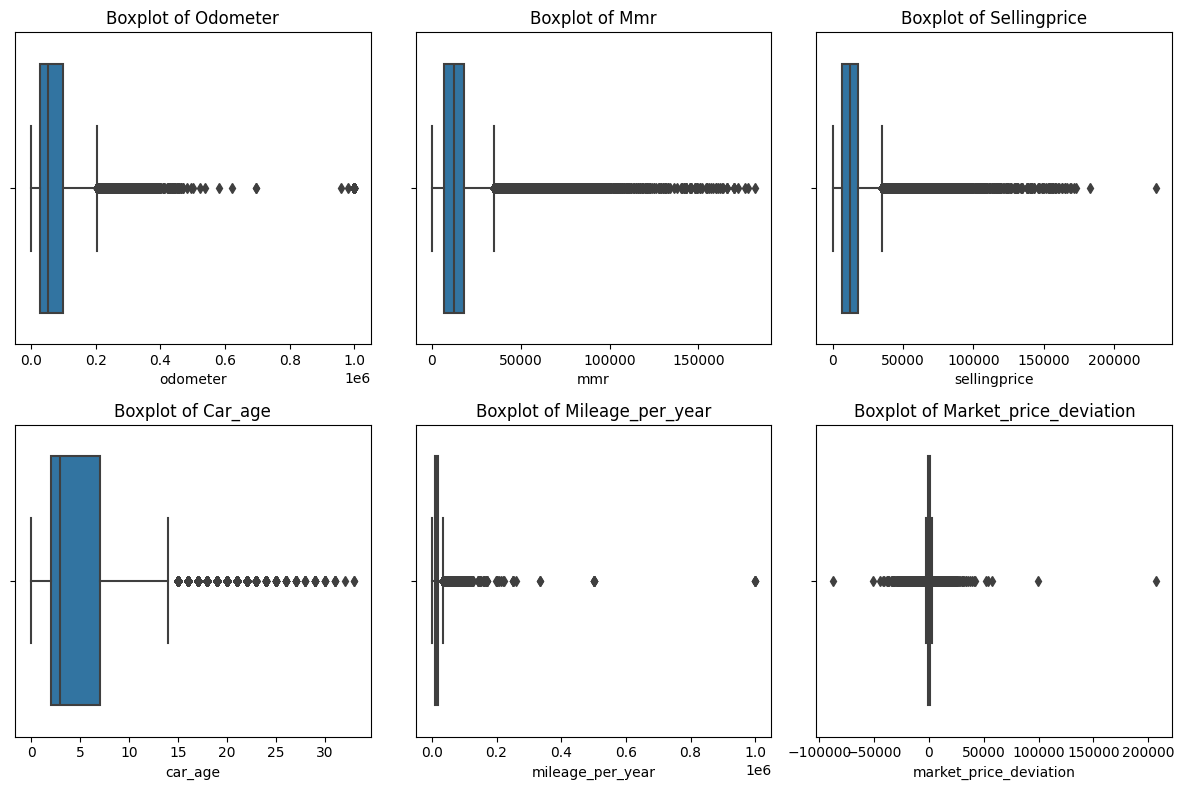

In [1059]:
#Defining columns for box plots
columns_for_boxplots = ['odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

#Creating box plots for each column
plt.figure(figsize=(12, 8))
for i, column_name in enumerate(columns_for_boxplots, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=car_df[column_name])
    plt.title(f'Boxplot of {column_name.capitalize()}')

plt.tight_layout()
plt.show()


#### It was previously identified that the existing numerical columns contained outliers. Now, it's clear that the newly added columns also have outliers, necessitating their removal from the dataset.

In [1060]:
#Defining columns to check for outliers
columns_to_check = ['odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

#Creating an empty dictionary to store counts of outliers for each column
outliers_count = {}

#Iterating through each column and calculate the count of outliers using the IQR method
for column_name in columns_to_check:
    Q1 = car_df[column_name].quantile(0.25)
    Q3 = car_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    #Identifying outliers
    outliers_mask = (car_df[column_name] < lower_threshold) | (car_df[column_name] > upper_threshold)

    #Count outliers and store the count in the dictionary
    outliers_count[column_name] = outliers_mask.sum()

#Showing the count of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in '{column}': {count}")

Number of outliers in 'odometer': 10377
Number of outliers in 'mmr': 16258
Number of outliers in 'sellingprice': 16300
Number of outliers in 'car_age': 13832
Number of outliers in 'mileage_per_year': 34705
Number of outliers in 'market_price_deviation': 35086


#### Since there are many outliers identified, they will be addressed using the Interquartile Range (IQR) method for imputation. The IQR method assists in identifying and handling extreme values lying beyond the usual range of the dataset.

In [1061]:
#Defining columns to address outlier imputation
columns_to_check = ['odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

#Iterating through each column to handle outliers using median imputation
for column_name in columns_to_check:
    Q1 = car_df[column_name].quantile(0.25)  #Calculating the first quartile
    Q3 = car_df[column_name].quantile(0.75)  #Calculating the third quartile
    IQR = Q3 - Q1  #Determining the Interquartile Range (IQR)

    lower_threshold = Q1 - 1.5 * IQR  #Calculating the lower threshold
    upper_threshold = Q3 + 1.5 * IQR  #Calculating the upper threshold

    #Identifying outliers
    outliers_mask = (car_df[column_name] < lower_threshold) | (car_df[column_name] > upper_threshold)

    #Replacing outliers with the median value
    median_value = car_df[column_name].median()
    car_df.loc[outliers_mask, column_name] = median_value


In [1062]:
#Defining columns to check for outliers
columns_to_check = ['odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

#Creating an empty dictionary to store counts of outliers for each column
outliers_count = {}

#Iterating through each column and calculate the count of outliers using the IQR method
for column_name in columns_to_check:
    Q1 = car_df[column_name].quantile(0.25)
    Q3 = car_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    #Identifying outliers
    outliers_mask = (car_df[column_name] < lower_threshold) | (car_df[column_name] > upper_threshold)

    #Count outliers and store the count in the dictionary
    outliers_count[column_name] = outliers_mask.sum()

#Showing the count of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in '{column}': {count}")

Number of outliers in 'odometer': 3409
Number of outliers in 'mmr': 5238
Number of outliers in 'sellingprice': 5324
Number of outliers in 'car_age': 0
Number of outliers in 'mileage_per_year': 17910
Number of outliers in 'market_price_deviation': 17627


#### After applying IQR imputation, most columns show a reduction in outlier counts. However, 'mileage_per_year' and 'market_price_deviation' still show many outliers. This might be due to their non-normal distributions or extreme values within the IQR range but distant from the bulk of the data, leading to persistent outliers post-imputation.

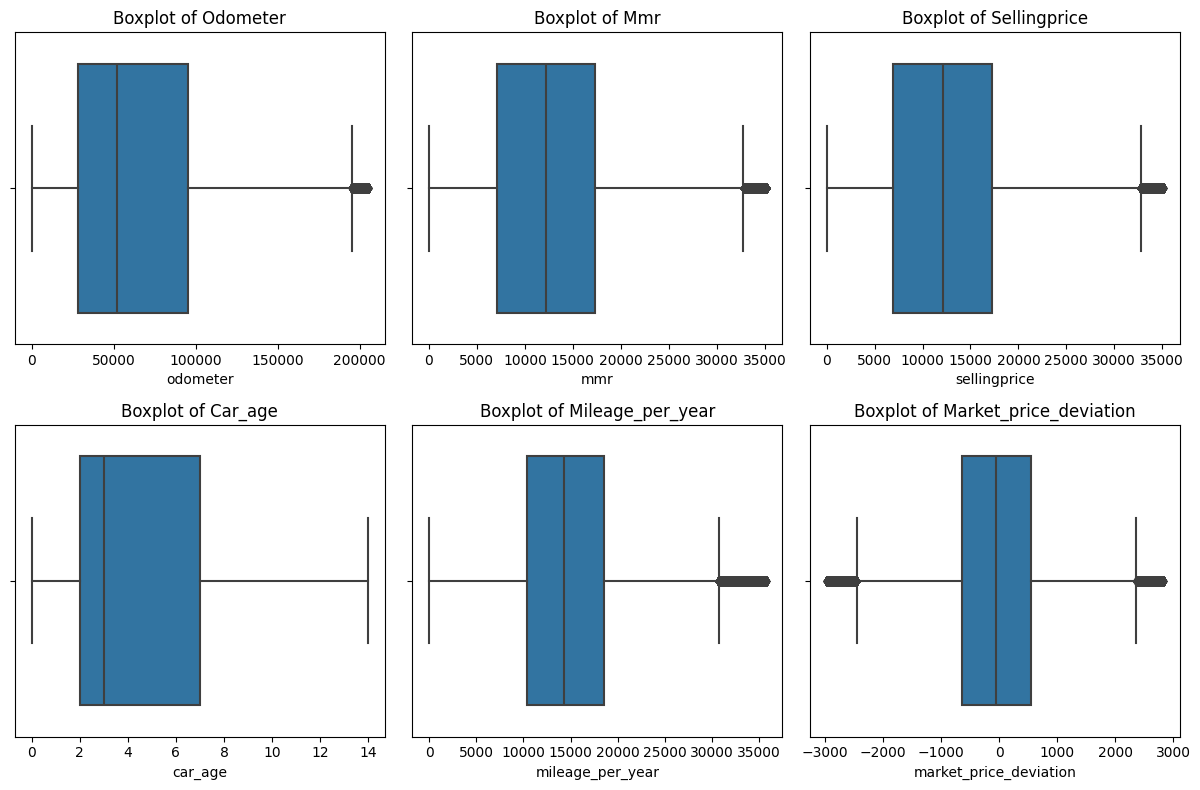

In [1063]:
#Defining columns for box plots
columns_for_boxplots = ['odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

#Creating box plots for each column
plt.figure(figsize=(12, 8))
for i, column_name in enumerate(columns_for_boxplots, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=car_df[column_name])
    plt.title(f'Boxplot of {column_name.capitalize()}')

plt.tight_layout()
plt.show()

#### The plots look way cleaner now that the majority of the outliers have been imputed

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Correlation of numericals</b></font></div>

In [1064]:
numerical_col = car_df.select_dtypes(['int64', 'float64']).columns
print(numerical_col)

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'year_of_sale',
       'car_age', 'mileage_per_year', 'market_price_deviation'],
      dtype='object')


In [1065]:
#Selecting numerical columns of interest
numerical_columns = ['condition', 'odometer', 'mmr', 'sellingprice', 'year_of_sale',
       'car_age', 'mileage_per_year', 'market_price_deviation']

#Calculating Pearson correlation
pearson_corr = car_df[numerical_columns].corr(method='pearson')['sellingprice'].sort_values(ascending=False)

#Calculating Spearman correlation
spearman_corr = car_df[numerical_columns].corr(method='spearman')['sellingprice'].sort_values(ascending=False)

print("Pearson correlation of numerical variables with 'sellingprice':")
print(pearson_corr)

print("\nSpearman correlation of numerical variables with 'sellingprice':")
print(spearman_corr)

Pearson correlation of numerical variables with 'sellingprice':
sellingprice              1.000000
mmr                       0.956775
condition                 0.561528
market_price_deviation    0.123530
year_of_sale              0.089303
mileage_per_year         -0.008901
car_age                  -0.592909
odometer                 -0.622258
Name: sellingprice, dtype: float64

Spearman correlation of numerical variables with 'sellingprice':
sellingprice              1.000000
mmr                       0.969457
condition                 0.590739
market_price_deviation    0.132102
year_of_sale              0.095639
mileage_per_year         -0.028964
car_age                  -0.605570
odometer                 -0.656513
Name: sellingprice, dtype: float64


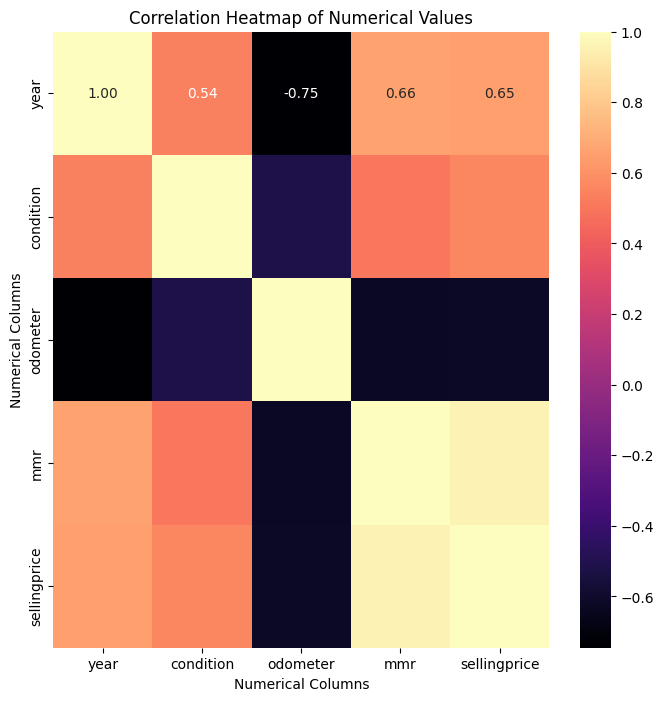

In [1066]:
#Calculating the correlation matrix for numerical features
numerical_corr = car_df[num_features].corr()

#Showing the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(numerical_corr, annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap of Numerical Values')
plt.xlabel('Numerical Columns')
plt.ylabel('Numerical Columns')
plt.show()


> #### The correlation coefficients (Pearson and Spearman) between the numerical variables and the 'sellingprice' provide insights into the relationships between these variables:
>
> 1. Pearson Correlation:
>>    - The 'sellingprice' has a very strong positive correlation with 'mmr' (0.984), suggesting a high linear relationship between the maximum retail price ('mmr') and the selling price.
>>
>>    - A moderately positive correlation exists between 'sellingprice' and 'year' (0.586) and 'condition' (0.539). This indicates that newer years and better conditions tend to be associated with higher selling prices, but the relationship is not as strong as with 'mmr'.
>>
>>    - 'Sellingprice' has a moderately negative correlation with 'odometer' (-0.582), implying that as the odometer reading increases (indicating higher mileage), the selling price tends to decrease.
>>
>
> 2. Spearman Correlation:
>>    - The Spearman correlation coefficients show similar trends to the Pearson correlation, but they consider monotonic relationships rather than just linear ones.
>>
>>    - 'mmr' demonstrates a very strong positive monotonic relationship with 'sellingprice' (0.979).
>>
>>    - 'Year', 'condition', and 'odometer' also show relatively strong positive and negative monotonic relationships with 'sellingprice', similar to Pearson correlations but considering non-linear associations.
>>
> Conclusions:
>> - Both Pearson and Spearman correlations indicate that 'mmr' has the strongest association with 'sellingprice', suggesting that the maximum retail price is highly influential in determining the selling price of cars.
>>
>> - 'Year' and 'condition' have moderate positive associations, indicating that newer vehicles in better condition tend to have higher selling prices.
>>
>> - Conversely, 'odometer' (indicating higher mileage) has a moderate negative association, meaning that increased mileage tends to decrease the selling price.
>
> Correlation does not imply causation, and other factors not considered here might influence the selling price of cars. These correlation coefficients provide valuable insights into the relationships between these variables but do not establish causative relationships.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Feature Scaling/Normalisation</b></font></div>

In [1067]:
#Summary statistics before preprocessing
print("Summary Statistics Before Preprocessing:")
print(car_df[numerical_columns].describe())

Summary Statistics Before Preprocessing:
           condition       odometer            mmr   sellingprice  \
count  558610.000000  558610.000000  558610.000000  558610.000000   
mean        3.424310   64749.593137   12788.208500   12626.761748   
std         0.939241   46461.765749    7573.681227    7656.071265   
min         1.000000       1.000000      25.000000       1.000000   
25%         2.700000   28398.000000    7100.000000    6900.000000   
50%         3.500000   52270.250000   12250.000000   12100.000000   
75%         4.200000   95267.000000   17350.000000   17250.000000   
max         5.000000  205203.000000   35100.000000   35100.000000   

        year_of_sale        car_age  mileage_per_year  market_price_deviation  
count  558610.000000  558610.000000     558610.000000           558610.000000  
mean     2014.904180       4.526571      15004.078383              -50.253646  
std         0.294344       3.450662       6758.448585             1043.209496  
min      2014.000

In [1068]:
#Performing feature scaling with the StandardScaler
scaler = StandardScaler()
car_df[numerical_columns] = scaler.fit_transform(car_df[numerical_columns])

In [1069]:
#Summary statistics after preprocessing
print("\nSummary Statistics After Preprocessing:")
print(car_df[numerical_columns].describe())


Summary Statistics After Preprocessing:


          condition      odometer           mmr  sellingprice  year_of_sale  \
count  5.586100e+05  5.586100e+05  5.586100e+05  5.586100e+05  5.586100e+05   
mean  -1.064396e-15  3.279174e-17 -2.223427e-17 -1.240438e-16 -2.912974e-13   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -2.581140e+00 -1.393590e+00 -1.685207e+00 -1.649119e+00 -3.071846e+00   
25%   -7.711660e-01 -7.823987e-01 -7.510500e-01 -7.480033e-01  3.255372e-01   
50%    8.058659e-02 -2.685941e-01 -7.106306e-02 -6.880320e-02  3.255372e-01   
75%    8.258701e-01  6.568290e-01  6.023221e-01  6.038662e-01  3.255372e-01   
max    1.677623e+00  3.022992e+00  2.945967e+00  2.935351e+00  3.255372e-01   

            car_age  mileage_per_year  market_price_deviation  
count  5.586100e+05      5.586100e+05            5.586100e+05  
mean   9.198985e-17      9.081963e-16           -3.052761e-18  
std    1.000001e+00      1.000001e+00            1.000001e+00  
min   -1.311799e+00     -2.22004

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Feature Encoding</b></font></div>

Mapping the following features
- brand
- trim
- body
- color
- interior
- transmission

In [1070]:
#Creating a mapping dictionary for 'brand' labels
mapped_brand = {'Others': 0, 'Ford': 1, 'Chevrolet': 2, 'Nissan': 3, 'Toyota': 4, 
                'Dodge': 5, 'Honda': 6, 'Hyundai': 7, 'Bmw': 8, 'Kia': 9, 'Chrysler': 10}

#Mapping 'brand' to numerical labels and create a new 'brand_label' column
car_df['brand_label'] = car_df['brand'].map(mapped_brand)

In [1071]:
#Creating a mapping dictionary for 'trim' labels
mapped_trim = {'Others': 0, 'Base': 1, 'Se': 2, 'Lx': 3, 'Limited': 4, 'Lt': 5,
               'Xlt': 6, 'Ls': 7, 'Le': 8, 'Gls': 9, 'S': 10}

#Mapping 'trim' to numerical labels and create a new 'trim_label' column
car_df['trim_label'] = car_df['trim'].map(mapped_trim)

In [1072]:
#Creating a mapping dictionary for 'body' labels
mapped_body = {'Other': 0, 'Sedan': 1, 'Suv': 2, 'Cab': 3, 'Van': 4, 'Coupe': 5, 'Convertible': 6}

#Mapping 'body' to numerical labels and generate a new 'body_label' column
car_df['body_label'] = car_df['body'].map(mapped_body)

In [1073]:
#Creating a mapping dictionary for 'color' labels
mapped_color = {'Other': 0, 'Silver': 1, 'Black': 2, 'White': 3, 'Red': 4, 'Blue': 5}

#Mapping 'color' to numerical labels and generate a new 'color_label' column
car_df['color_label'] = car_df['color'].map(mapped_color)

In [1074]:
#Creating a mapping dictionary for 'interior' labels
mapped_interior = {'Other': 0, 'Black': 1, 'Silver': 2, 'Beige': 3, 'Tan': 4}

#Mapping 'interior' to numerical labels and generate a new 'interior_label' column
car_df['interior_label'] = car_df['interior'].map(mapped_interior)

In [1075]:
#Creating a mapping dictionary for 'transmission' labels
mapped_transmission = {'Automatic': 0, 'Manual': 1}

#Mapping 'transmission' to numerical labels and generate a new 'transmission_label' column
car_df['transmission_label'] = car_df['transmission'].map(mapped_transmission)

In [1076]:
car_df.sample(3)

,year,brand,model,trim,body,transmission,vin,state,condition,odometer,...,year_of_sale,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
287079,2009,Chevrolet,Impala,Lt,Sedan,Automatic,2g1wt57k191311940,tx,0.932339,1.212943,...,0.325537,0.426999,0.766462,0.958824,2,5,1,1,1,0
334167,2007,Others,Others,Others,Other,Manual,wauhf78p07a038289,va,-1.622919,2.043239,...,0.325537,1.006599,0.733330,-1.437628,0,0,0,1,2,1
323866,2005,Dodge,Others,Others,Van,Automatic,1d4gp45r25b360667,oh,-1.622919,1.971180,...,0.325537,1.586198,0.093116,-1.174019,5,0,4,1,1,0


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Dropping Columns</b></font></div>

We don't need the following colomns: mmr, state, vin, seller, so we are dropping those columns

In [1077]:
car_df.columns

Index(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'brand_model', 'new_saledate_format',
       'date_part', 'year_of_sale', 'car_age', 'mileage_per_year',
       'market_price_deviation', 'brand_label', 'trim_label', 'body_label',
       'color_label', 'interior_label', 'transmission_label'],
      dtype='object')

In [1078]:
#List of columns to be dropped (replace with the columns you want to remove)
drop_colomns = ['mmr', 'state', 'vin', 'seller', 'saledate', 'new_saledate_format', 
                'date_part', 'year_of_sale']

#Dropping the specified columns from the DataFrame
car_df = car_df.drop(columns=drop_colomns)

In [1079]:
car_df.columns

Index(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'sellingprice', 'brand_model',
       'car_age', 'mileage_per_year', 'market_price_deviation', 'brand_label',
       'trim_label', 'body_label', 'color_label', 'interior_label',
       'transmission_label'],
      dtype='object')

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Dataset for Modelling</b></font></div>

Using feather to save the dataset to use for modelling

In [1080]:
import pyarrow.feather as feather
feather.write_feather(car_df, 'processed_data.feather')